In [10]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from datetime import datetime
from wordcloud import WordCloud

In [11]:
# Load the dataset
df = pd.read_excel('flipdata_44.xlsx')
# Replace NaN values with unspecified labels
df['type'] = df['type'].fillna('Unspecified Type')
df['style'] = df['style'].fillna('Unspecified Style')

In [12]:
# 1. Top Categories by Product Count - Bar Plot
# Get the top 15 categories by product count
top_categories = df['category'].value_counts().head(15)

fig = go.Figure(data=[go.Pie(
    labels=top_categories.index,
    values=top_categories.values,
    hole=0.3,
    textinfo='percent+value',  # Show percentage and value inside the pie slices
    insidetextorientation='auto'  # Automatically adjust text orientation
)])

# Update the layout for title and styling
fig.update_layout(
    annotations=[dict(text='Product', x=0.5, y=0.5, font_size=25, showarrow=False)],
    title_text="Top 15 Categories by Product Count",
    title_x=0.5,  # Center the title
    width=800,  # Increase chart width
    height=600  # Increase chart height
)

# Show the pie chart
fig.show()

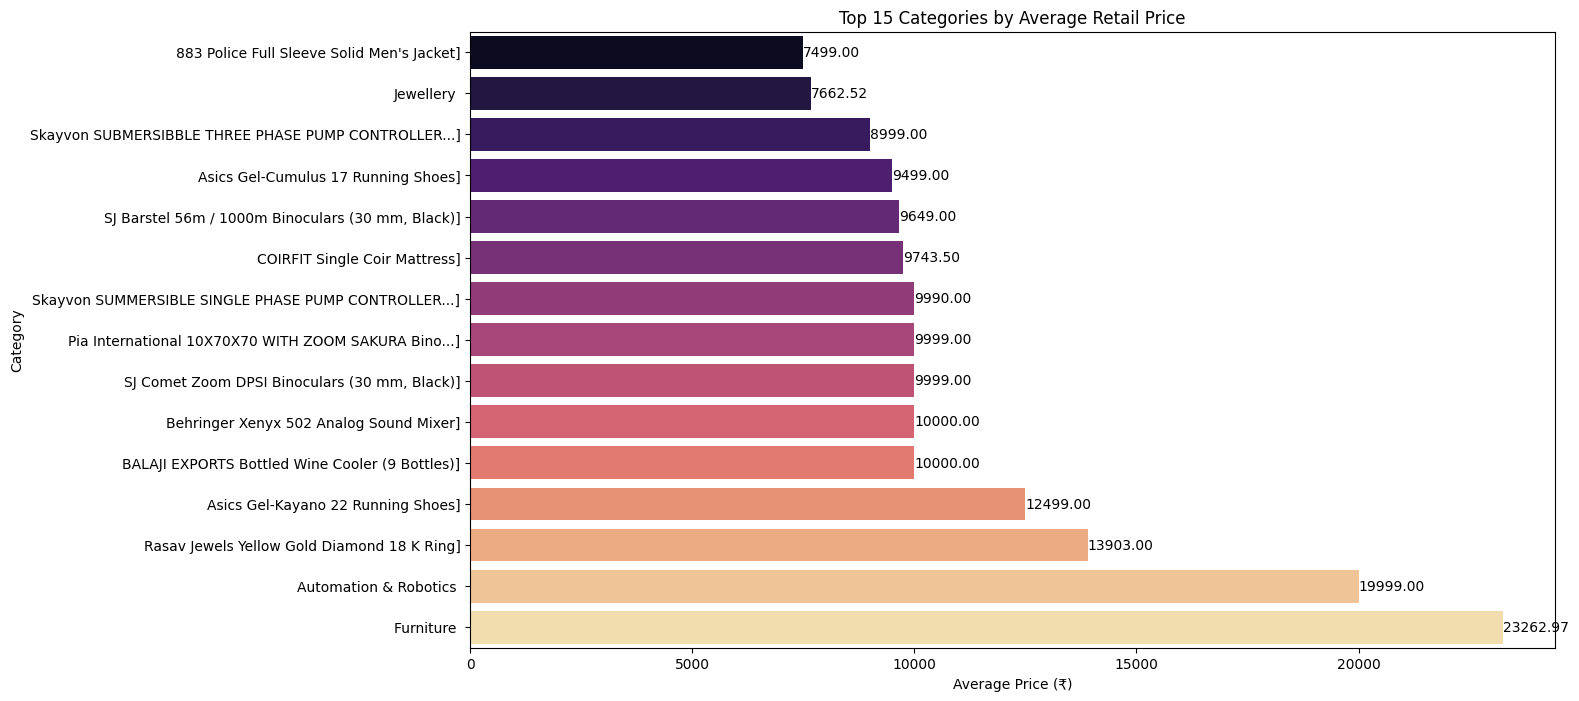

In [13]:
# 2. Category-wise Average Price - Horizontal Bar Plot
plt.figure(figsize=(14, 8))
# Calculate the average retail price for each category and sort
cat_avg_price = df.groupby('category')['retail_price'].mean().sort_values(ascending=True).tail(15)
# Create a bar plot
ax = sns.barplot(x=cat_avg_price.values, y=cat_avg_price.index, palette='magma', hue=cat_avg_price.index, dodge=False)
# Add title and labels
plt.title('Top 15 Categories by Average Retail Price', fontsize=12)
plt.xlabel('Average Price (₹)')
plt.ylabel('Category')
plt.legend([], [], frameon=False)
# Annotate each bar with the average price value
for i, value in enumerate(cat_avg_price):
    ax.text(value, i, f'{value:.2f}', va='center', ha='left', color='black')
# Show the plot
plt.show()

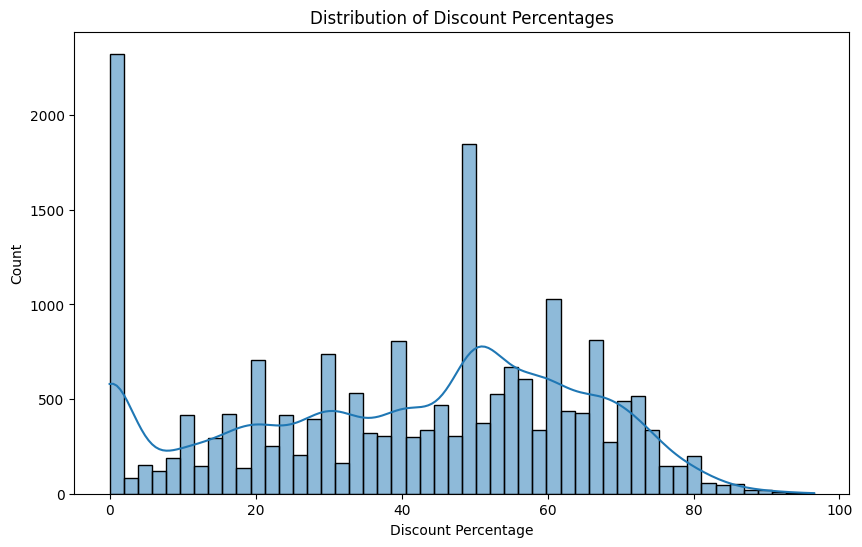

In [14]:
# 3. Discount Distribution - Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='discount_percentage', bins=50, kde=True)
plt.title('Distribution of Discount Percentages', fontsize=12)
plt.xlabel('Discount Percentage')
plt.ylabel('Count')
plt.show()

In [16]:
# 4. Brand Market Share - Treemap using Plotly
fig = px.treemap(df, path=['category','brand'], values='retail_price',
                 title='Brand Market Share by Total Retail Price')
fig.update_layout(width=1500, height=1000)
fig.show()

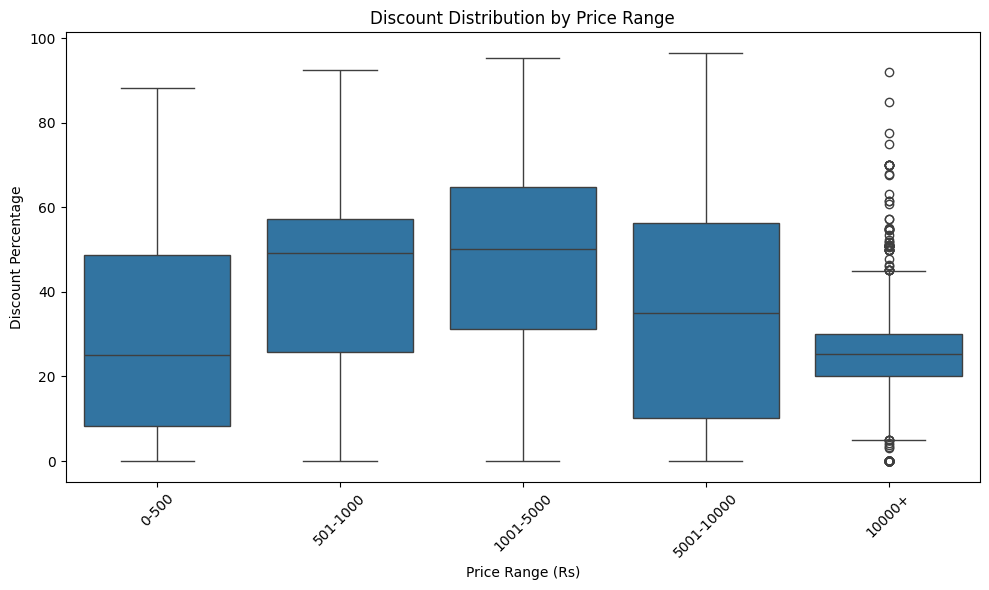

In [19]:
# 5: Discount Distribution by Price Range
df['price_range'] = pd.cut(df['retail_price'],
                          bins=[0, 500, 1000, 5000, 10000, float('inf')],
                          labels=['0-500', '501-1000', '1001-5000', '5001-10000', '10000+'])
#create the boxplot:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price_range', y='discount_percentage')
plt.title('Discount Distribution by Price Range')
plt.xlabel('Price Range (Rs)')
plt.ylabel('Discount Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

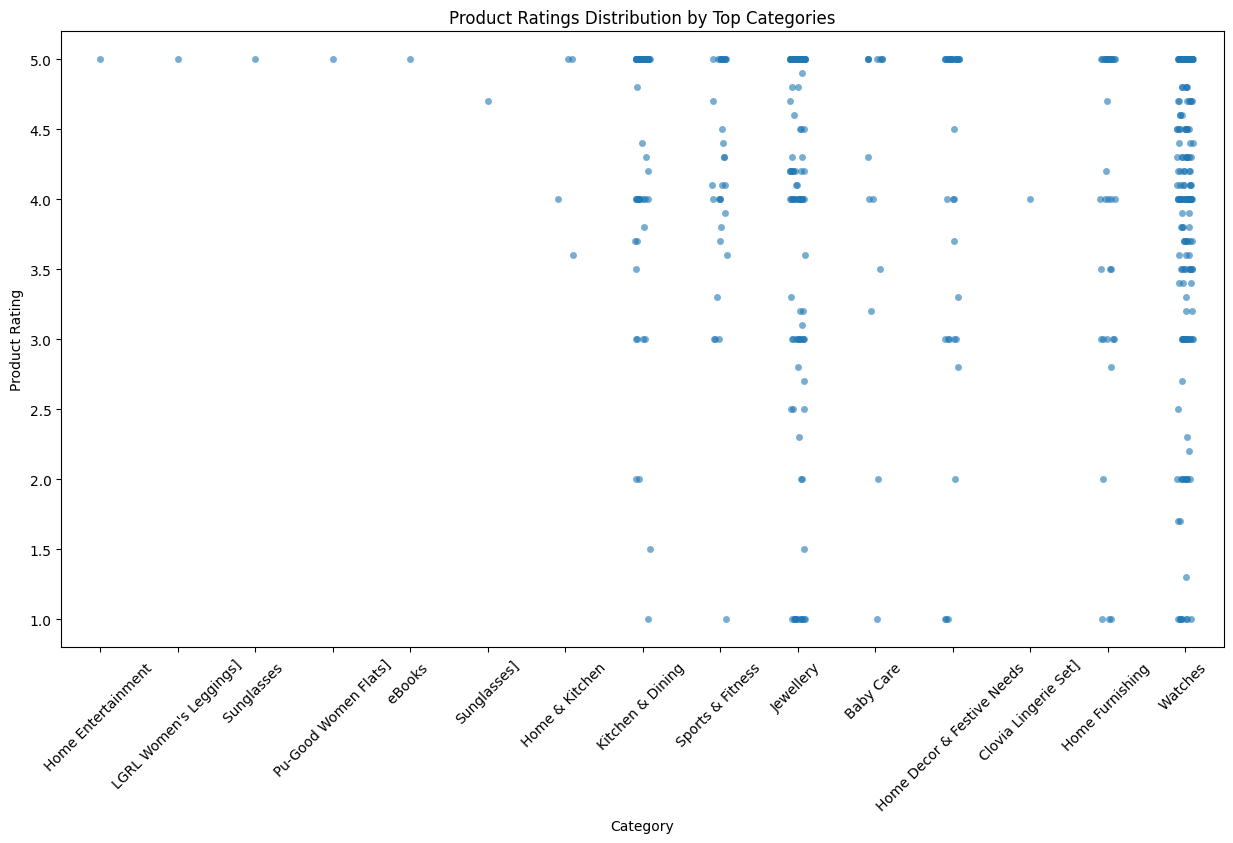

In [22]:
#6.Product Ratings Distribution by Top Categories
plt.figure(figsize=(15, 8))
sns.stripplot(data=df, x='category', y='product_rating',
              order=df.groupby('category')['product_rating'].mean().sort_values(ascending=False).head(15).index,
              jitter=True, alpha=0.6)

plt.xticks(rotation=45)
plt.title('Product Ratings Distribution by Top Categories', fontsize=12)
plt.xlabel('Category')
plt.ylabel('Product Rating')
plt.show()


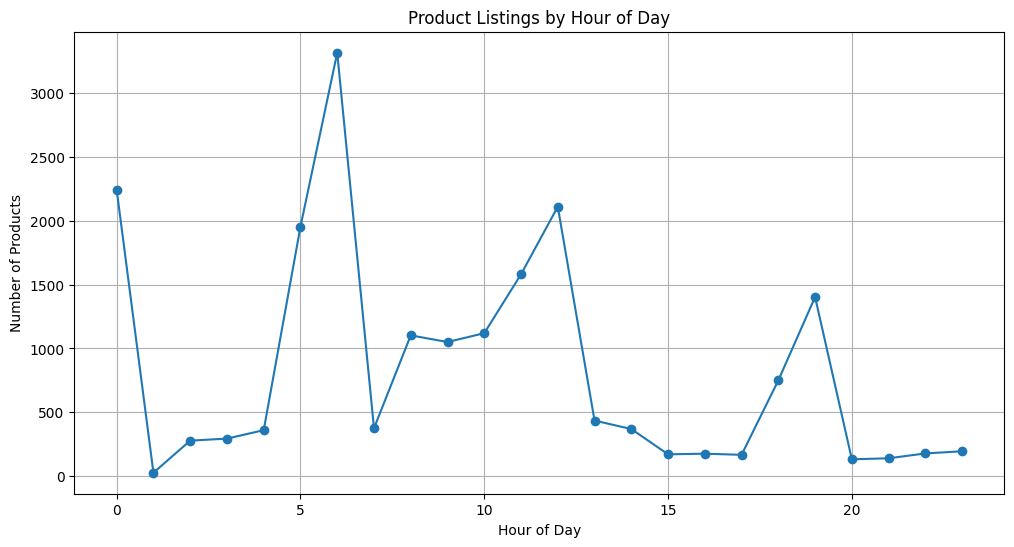

In [24]:
# 7. Time of Day Analysis - Line Plot
plt.figure(figsize=(12, 6))
hourly_products = df['time'].dt.hour.value_counts().sort_index()
plt.plot(hourly_products.index, hourly_products.values, marker='o')
plt.title('Product Listings by Hour of Day', fontsize=12)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()


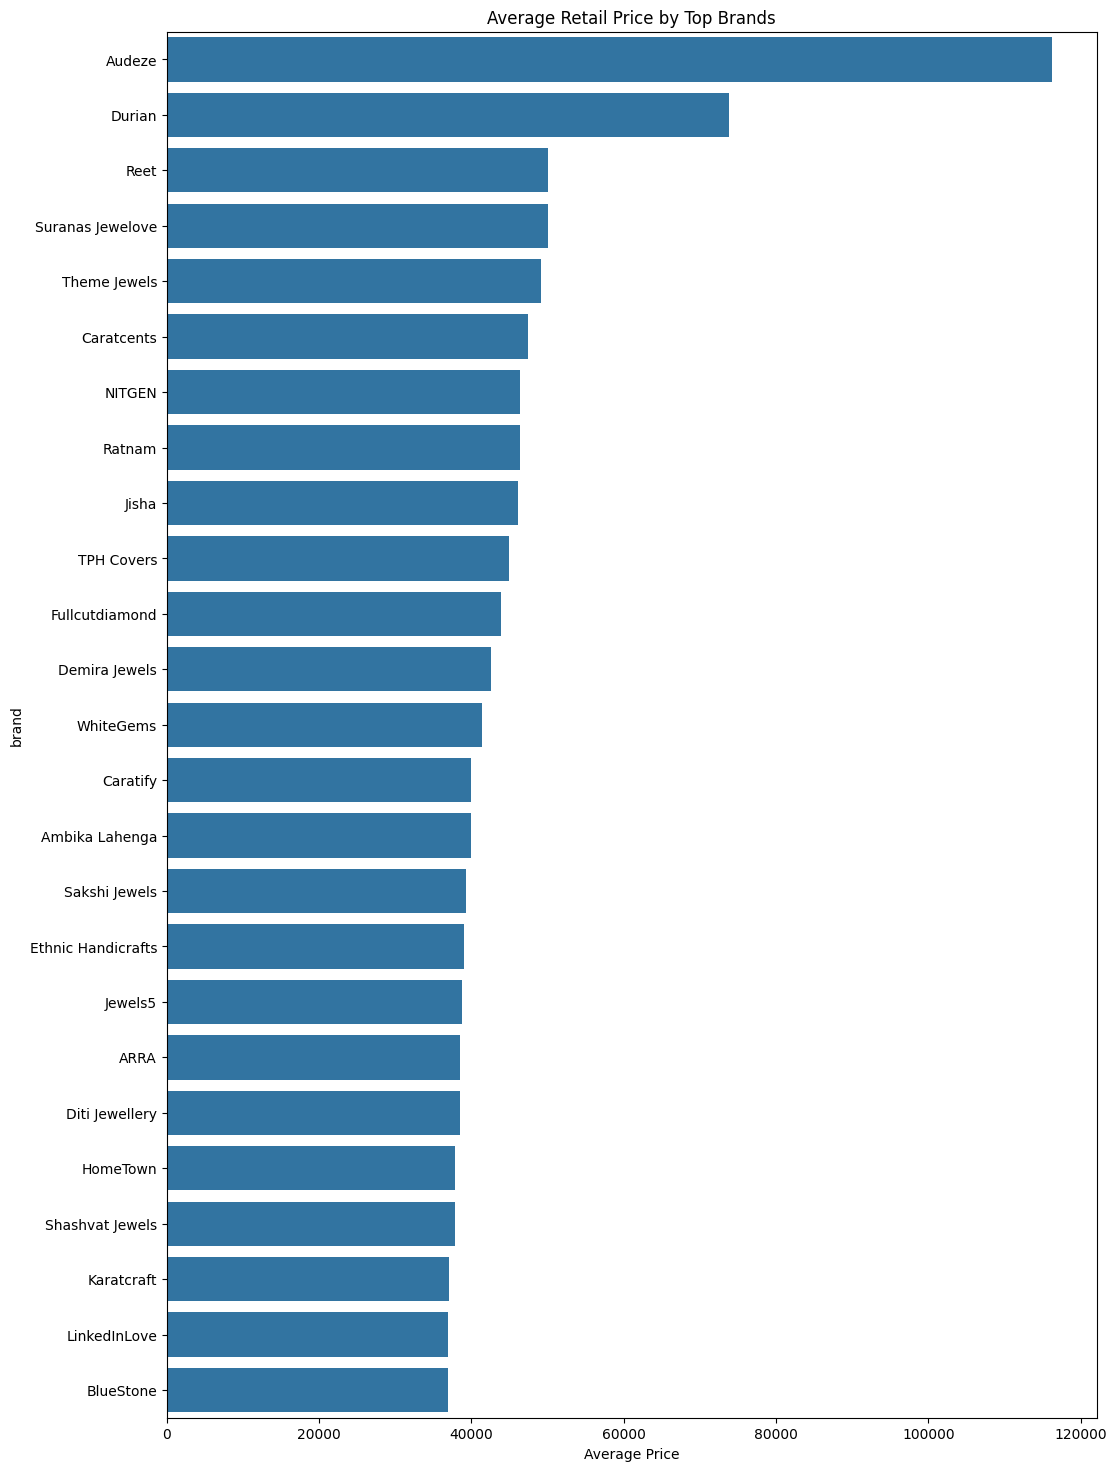

In [30]:
# 8. Brand Pricing Strategy - Bar Plot
plt.figure(figsize=(12, 18))
avg_price = df.groupby('brand')['retail_price'].mean().sort_values(ascending=False).head(25)
sns.barplot(x=avg_price.values, y=avg_price.index)
plt.title('Average Retail Price by Top Brands', fontsize=12)
plt.xlabel('Average Price')
plt.show()

<ipython-input-32-8e00aef1d3f8>:3: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



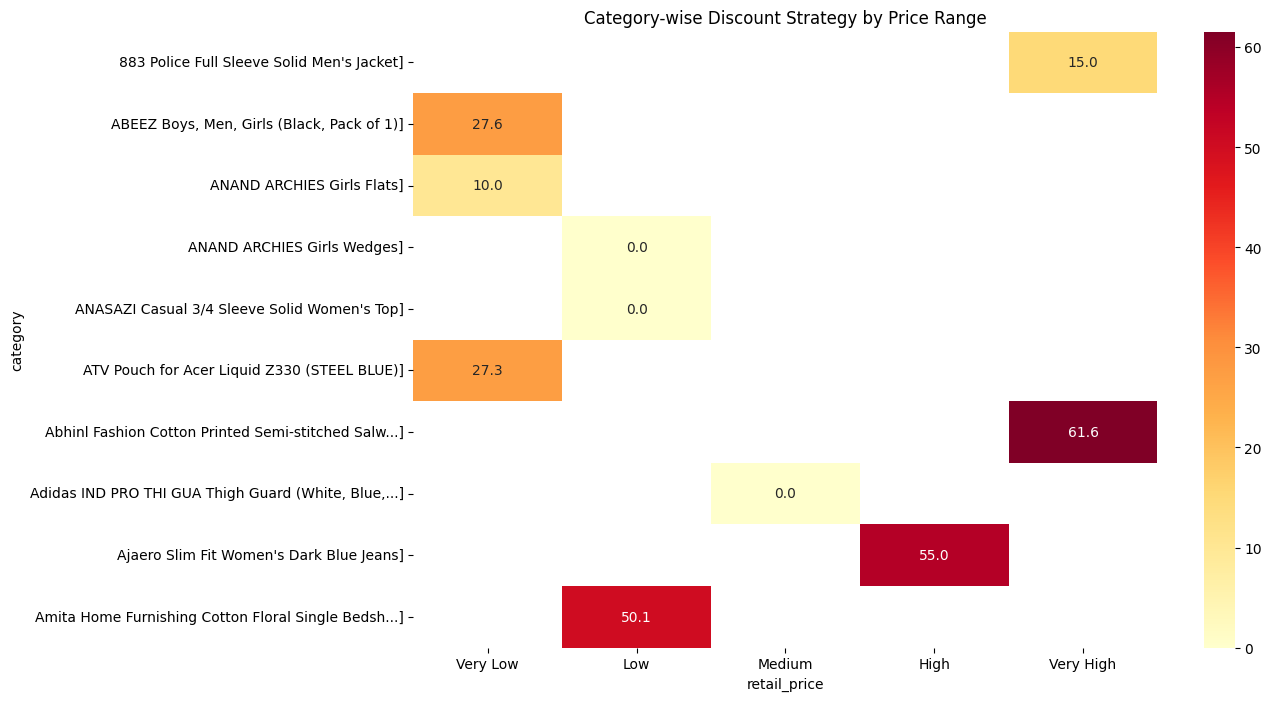

In [32]:
#9.Category-wise Discount Strategy by Price Range-heatmap
plt.figure(figsize=(12, 8))
category_discount_pivot = pd.pivot_table(
    df, values='discount_percentage',
    index='category',
    columns=pd.qcut(df['retail_price'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], duplicates='drop'),
    aggfunc='mean'
)

sns.heatmap(category_discount_pivot.head(10), annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Category-wise Discount Strategy by Price Range', fontsize=12)
plt.show()

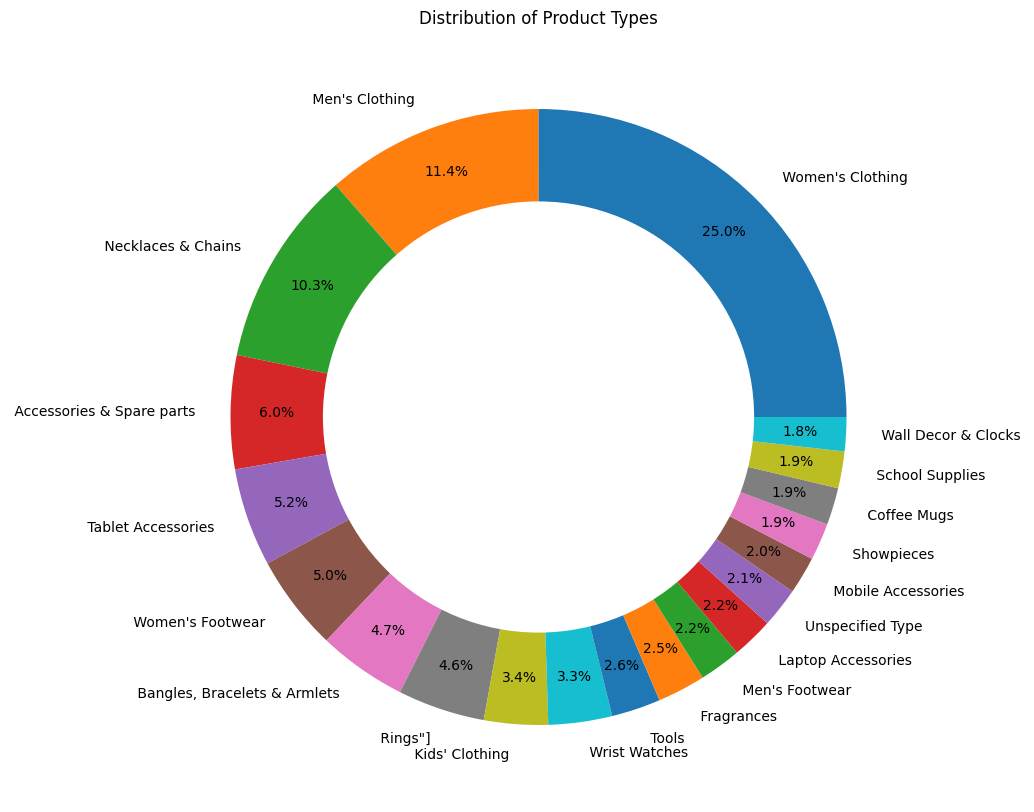

In [35]:
# 10. Product Type Distribution - Donut Chart
plt.figure(figsize=(10, 10))
type_counts = df['type'].value_counts().head(20)
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Product Types', fontsize=12)
plt.show()

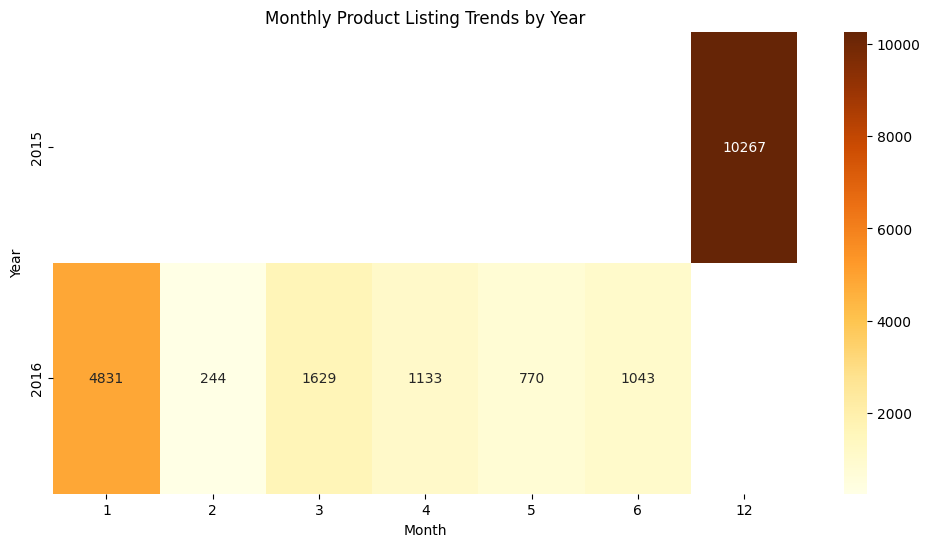

In [36]:
# 11. Seasonal Trends - Area Plot
# Pivot table for month vs year heatmap
monthly_sales_heatmap = df.pivot_table(index=df['date'].dt.year, columns=df['date'].dt.month, values='retail_price', aggfunc='count')
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_sales_heatmap, cmap='YlOrBr', annot=True, fmt='.0f')
plt.title('Monthly Product Listing Trends by Year', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


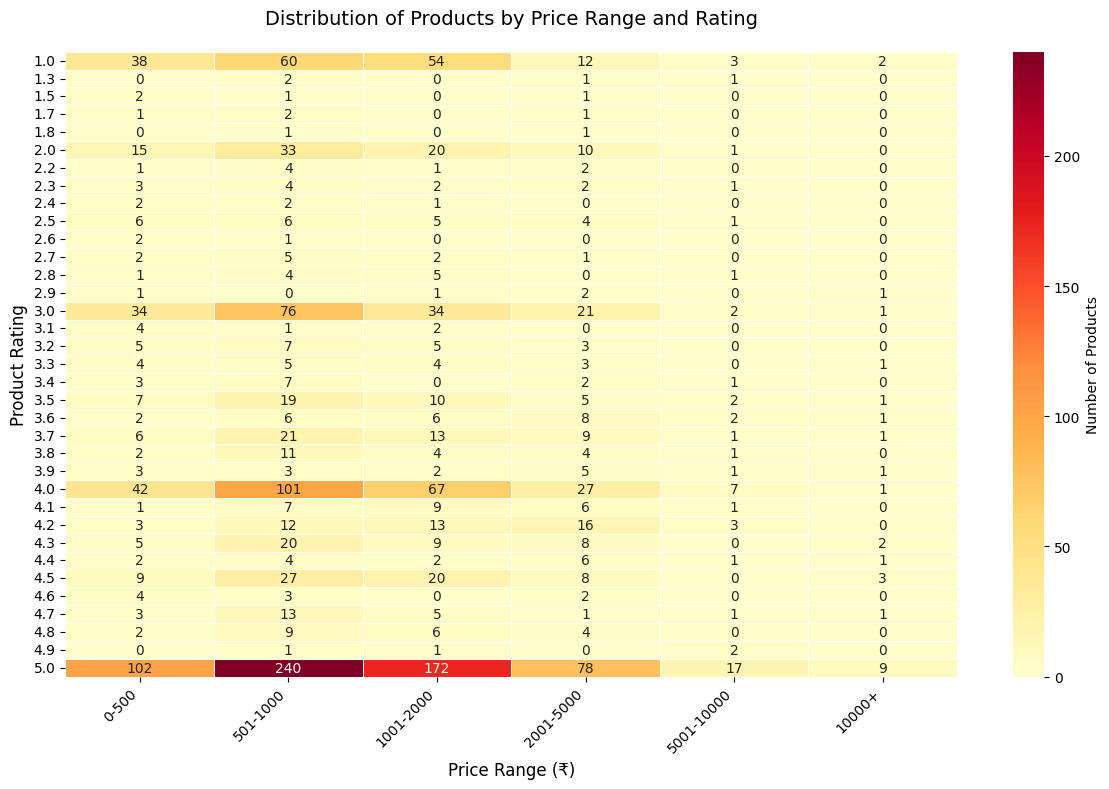

In [37]:
#12. Distribution of Products by Price Range and Rating
# Define price ranges for the 'retail_price' column
def get_price_range(price):
    if price <= 500:
        return '0-500'
    elif price <= 1000:
        return '501-1000'
    elif price <= 2000:
        return '1001-2000'
    elif price <= 5000:
        return '2001-5000'
    elif price <= 10000:
        return '5001-10000'
    else:
        return '10000+'

# Create a copy of the dataframe to avoid modifications to the original
df_copy = df.copy()

# Add a 'price_range' column based on 'retail_price'
df_copy['price_range'] = df_copy['retail_price'].apply(get_price_range)

# Round 'product_rating' to the nearest 0.1 for better grouping in the heatmap
df_copy['product_rating'] = df_copy['product_rating'].round(1)

# Create a count matrix based on price range and product rating
price_rating_count = df_copy.groupby(['product_rating', 'price_range']).size().reset_index(name='count')

# Filter out rows with product_rating of 0
filtered_count = price_rating_count[price_rating_count['product_rating'] != 0]

# Create pivot table for the heatmap
pivot_table = filtered_count.pivot(index='product_rating', columns='price_range', values='count').fillna(0)

# Sort the price range columns in logical order for display
price_order = ['0-500', '501-1000', '1001-2000', '2001-5000', '5001-10000', '10000+']
pivot_table = pivot_table[price_order]

# Create the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(pivot_table,
            annot=True,
            fmt='.0f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Number of Products'},
            linewidths=0.5)

# Add titles and labels
plt.title('Distribution of Products by Price Range and Rating', pad=20, fontsize=14)
plt.xlabel('Price Range (₹)', fontsize=12)
plt.ylabel('Product Rating', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()


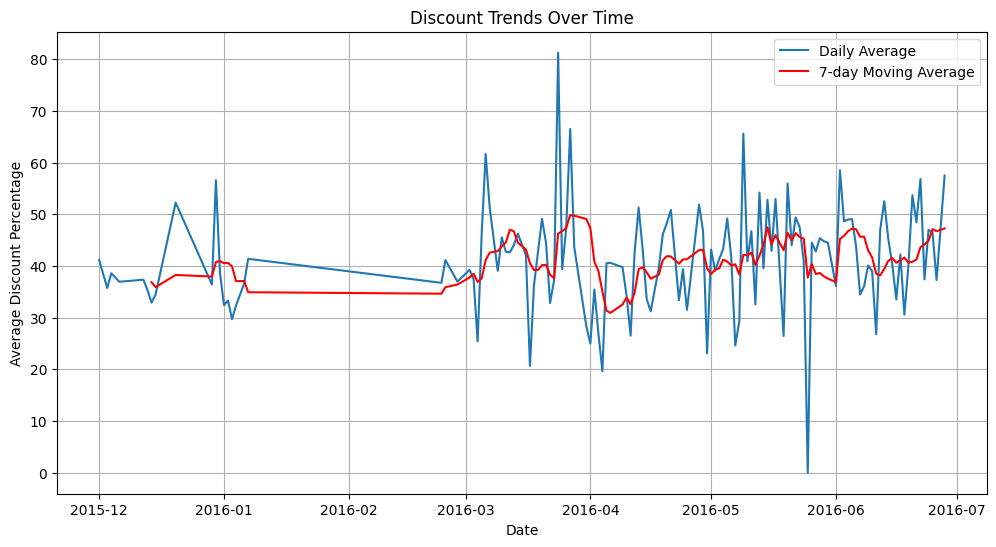

In [38]:
# 13. Discount Trends Over Time - Line Plot with Moving Average
plt.figure(figsize=(12, 6))
daily_discount = df.groupby('date')['discount_percentage'].mean()
plt.plot(daily_discount.index, daily_discount.values, label='Daily Average')
plt.plot(daily_discount.index, daily_discount.rolling(7).mean(), 'r-', label='7-day Moving Average')
plt.title('Discount Trends Over Time', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Average Discount Percentage')
plt.legend()
plt.grid(True)
plt.show()

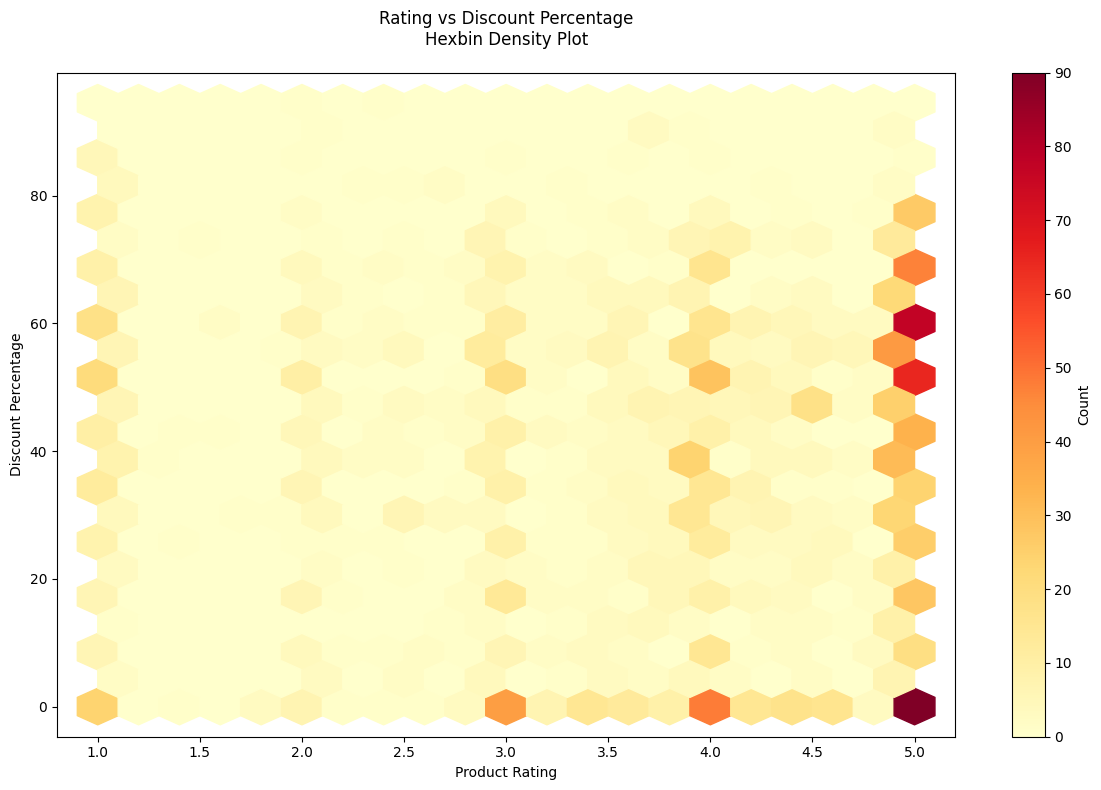

In [40]:
# 14. Rating vs Discount - Hexbin plot
plt.figure(figsize=(12, 8))
rating_discount_mask = (df['product_rating'] > 0) & (df['discount_percentage'] <= 100)
plt.hexbin(x=df[rating_discount_mask]['product_rating'],
           y=df[rating_discount_mask]['discount_percentage'],
           gridsize=20,
           cmap='YlOrRd')
plt.colorbar(label='Count')
plt.title('Rating vs Discount Percentage\nHexbin Density Plot', pad=20)
plt.xlabel('Product Rating')
plt.ylabel('Discount Percentage')

plt.tight_layout()
plt.show()


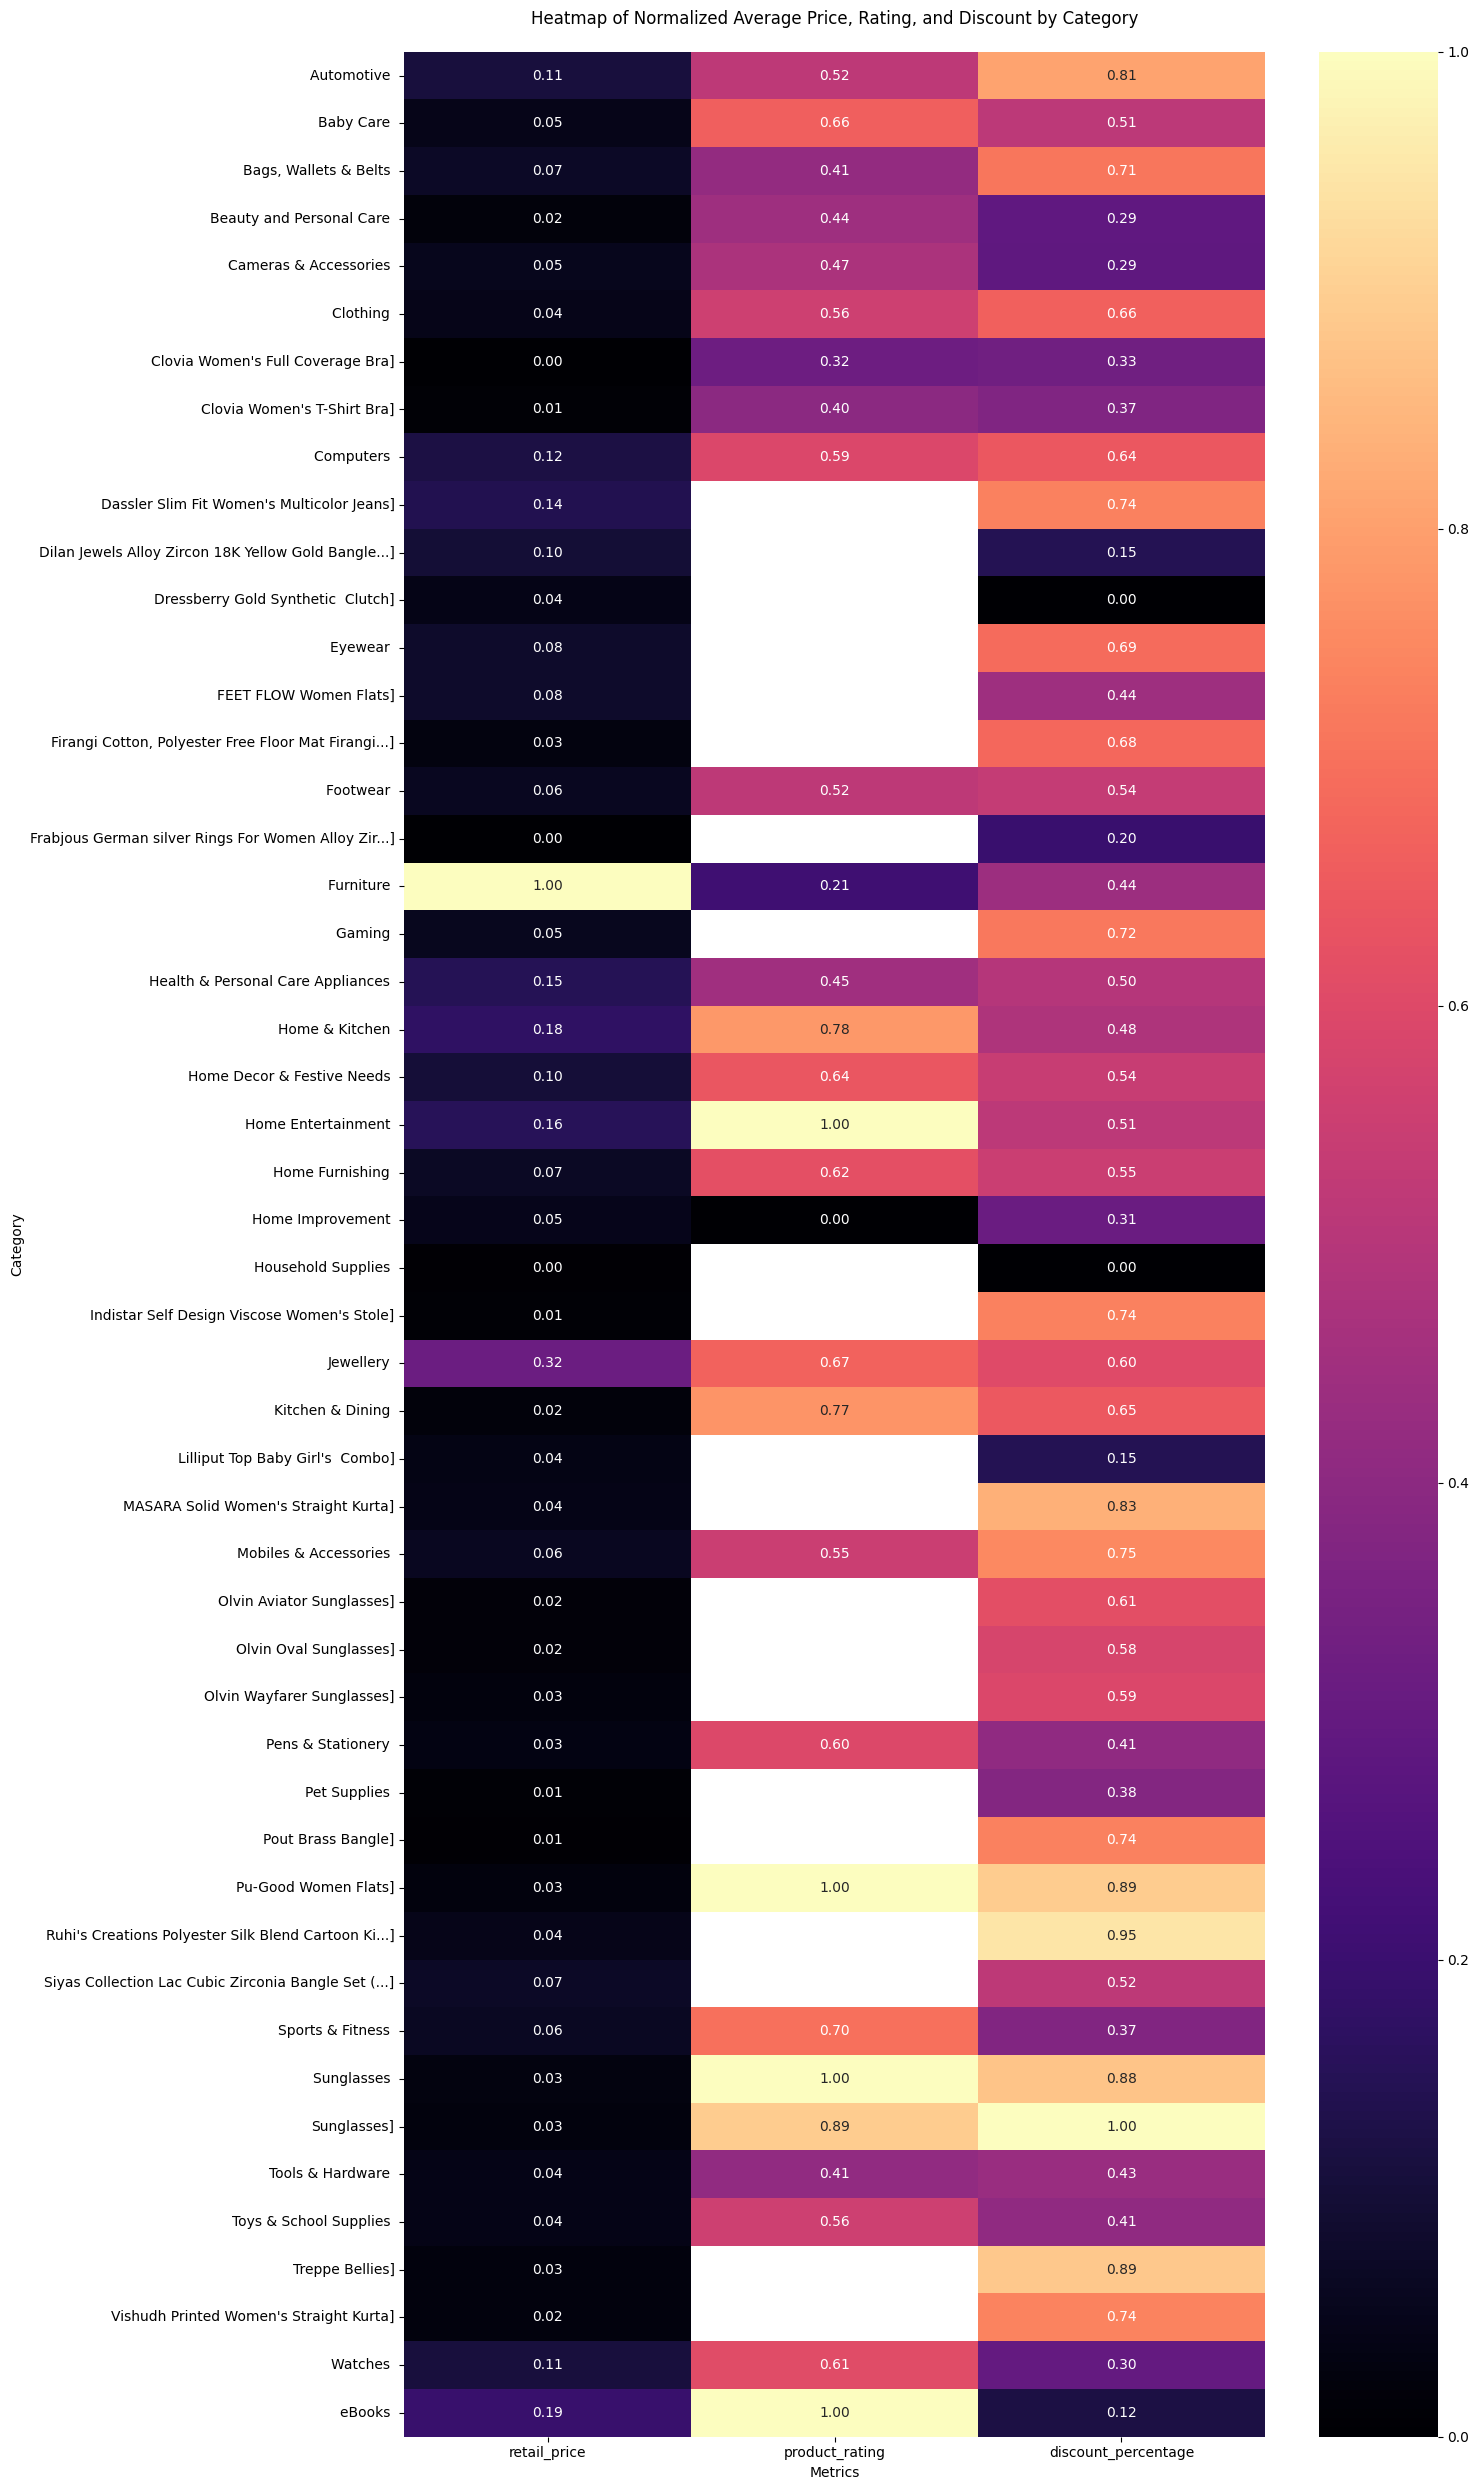

In [41]:
#15. Normalized Average Price, Rating, and Discount by Category
top_categories = df['category'].value_counts().head(50).index
category_stats = df[df['category'].isin(top_categories)].groupby('category').agg({
    'retail_price': 'mean',
    'product_rating': lambda x: x[x > 0].mean(),
    'discount_percentage': 'mean'
}).round(2)
# Normalize the metrics using min-max normalization
category_stats_normalized = (category_stats - category_stats.min()) / (category_stats.max() - category_stats.min())

# Plotting the heatmap
plt.figure(figsize=(15, 25))
sns.heatmap(category_stats_normalized, annot=True, fmt=".2f", cmap='magma')
plt.title('Heatmap of Normalized Average Price, Rating, and Discount by Category', pad=20)
plt.xlabel('Metrics')
plt.ylabel('Category')
plt.tight_layout()
plt.show()



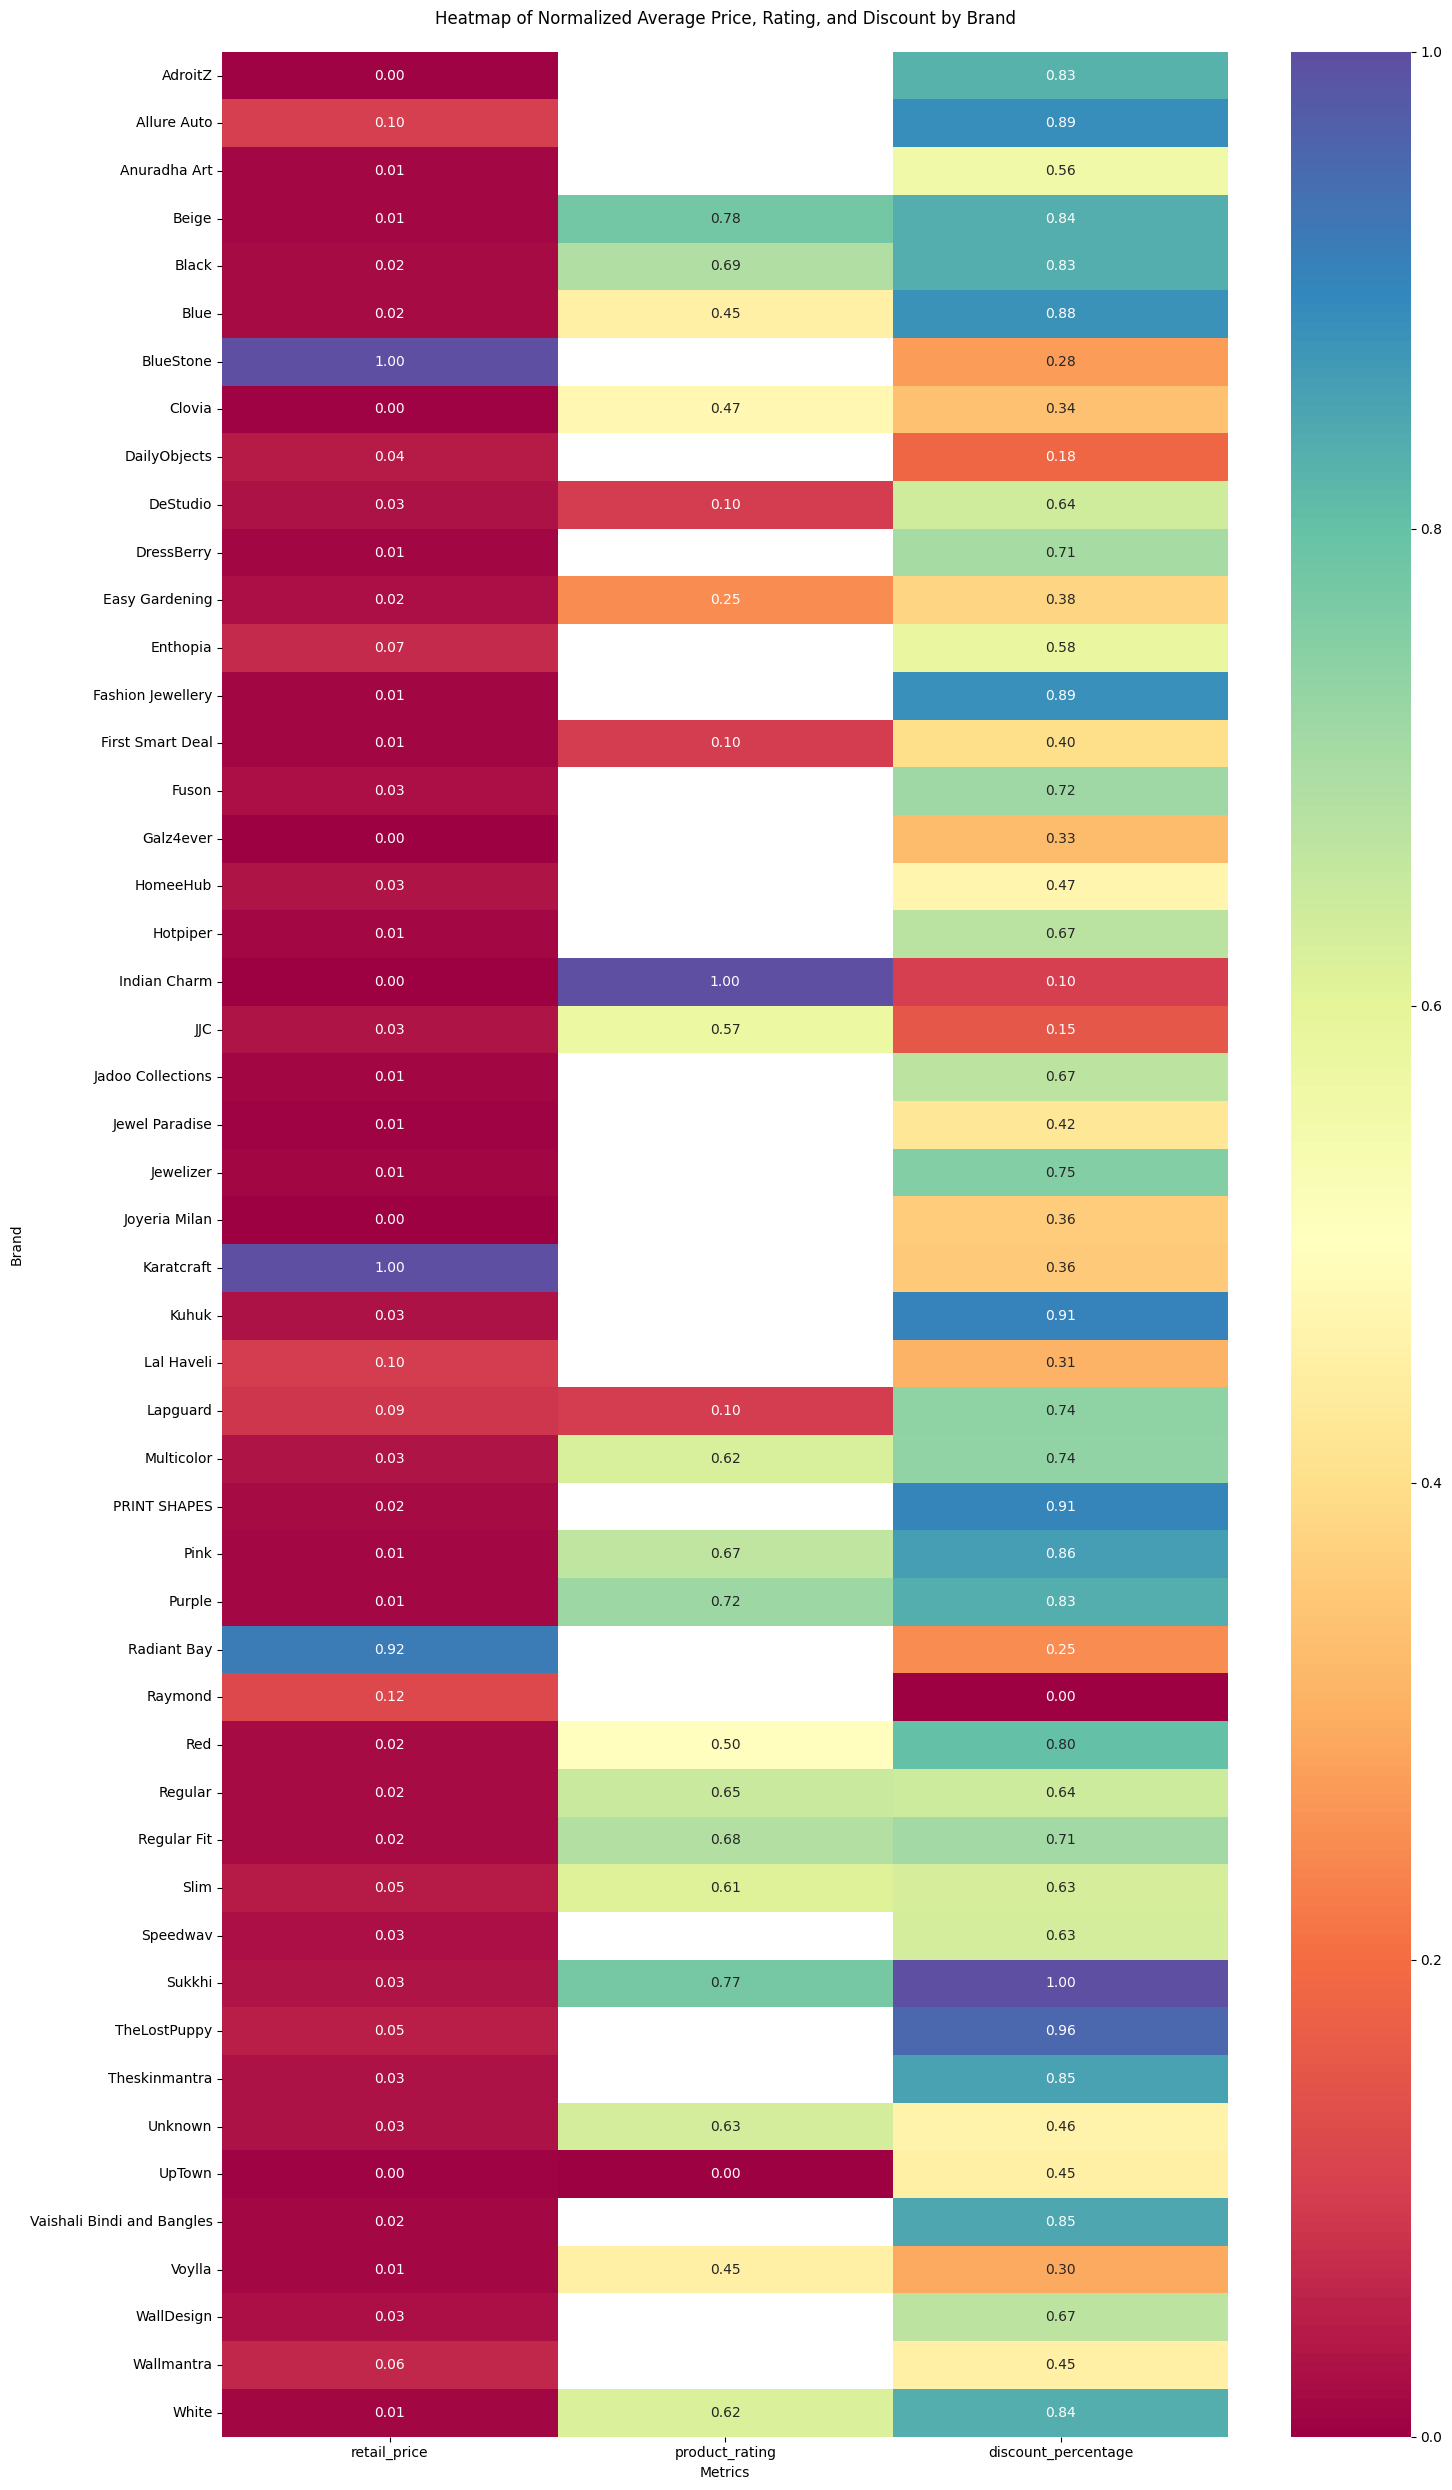

In [42]:
# 16. Normalized Average Price, Rating, and Discount by Brand
top_brands = df['brand'].value_counts().head(50).index
brand_stats = df[df['brand'].isin(top_brands)].groupby('brand').agg({
    'retail_price': 'mean',
    'product_rating': lambda x: x[x > 0].mean(),
    'discount_percentage': 'mean'
}).round(2)
# Normalize the metrics using min-max normalization
brand_stats_normalized = (brand_stats - brand_stats.min()) / (brand_stats.max() - brand_stats.min())

# Plotting the heatmap
plt.figure(figsize=(15, 25))
sns.heatmap(brand_stats_normalized, annot=True, fmt=".2f", cmap='Spectral')
plt.title('Heatmap of Normalized Average Price, Rating, and Discount by Brand', pad=20)
plt.xlabel('Metrics')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


In [44]:
#17. Product Hierarchy Distribution

# Create the sunburst chart
fig = px.sunburst(
    df,
    path=['category', 'type', 'style'],
    values='retail_price',
    title='Product Hierarchy Distribution with Missing Values Handled',
    # Custom color settings
    color='retail_price',
    color_continuous_scale='RdBu',
    # Add hover data
    hover_data=['retail_price'],
    # Custom formatting
    custom_data=['retail_price']
)

# Update layout for better visibility
fig.update_layout(
    title={
        'text': 'Product Hierarchy Distribution<br><sup>Including Unspecified Types and Styles</sup>',
        'x': 0.5,
        'xanchor': 'center'
    },
    width=1000,
    height=800
)

# Show the figure
fig.show()


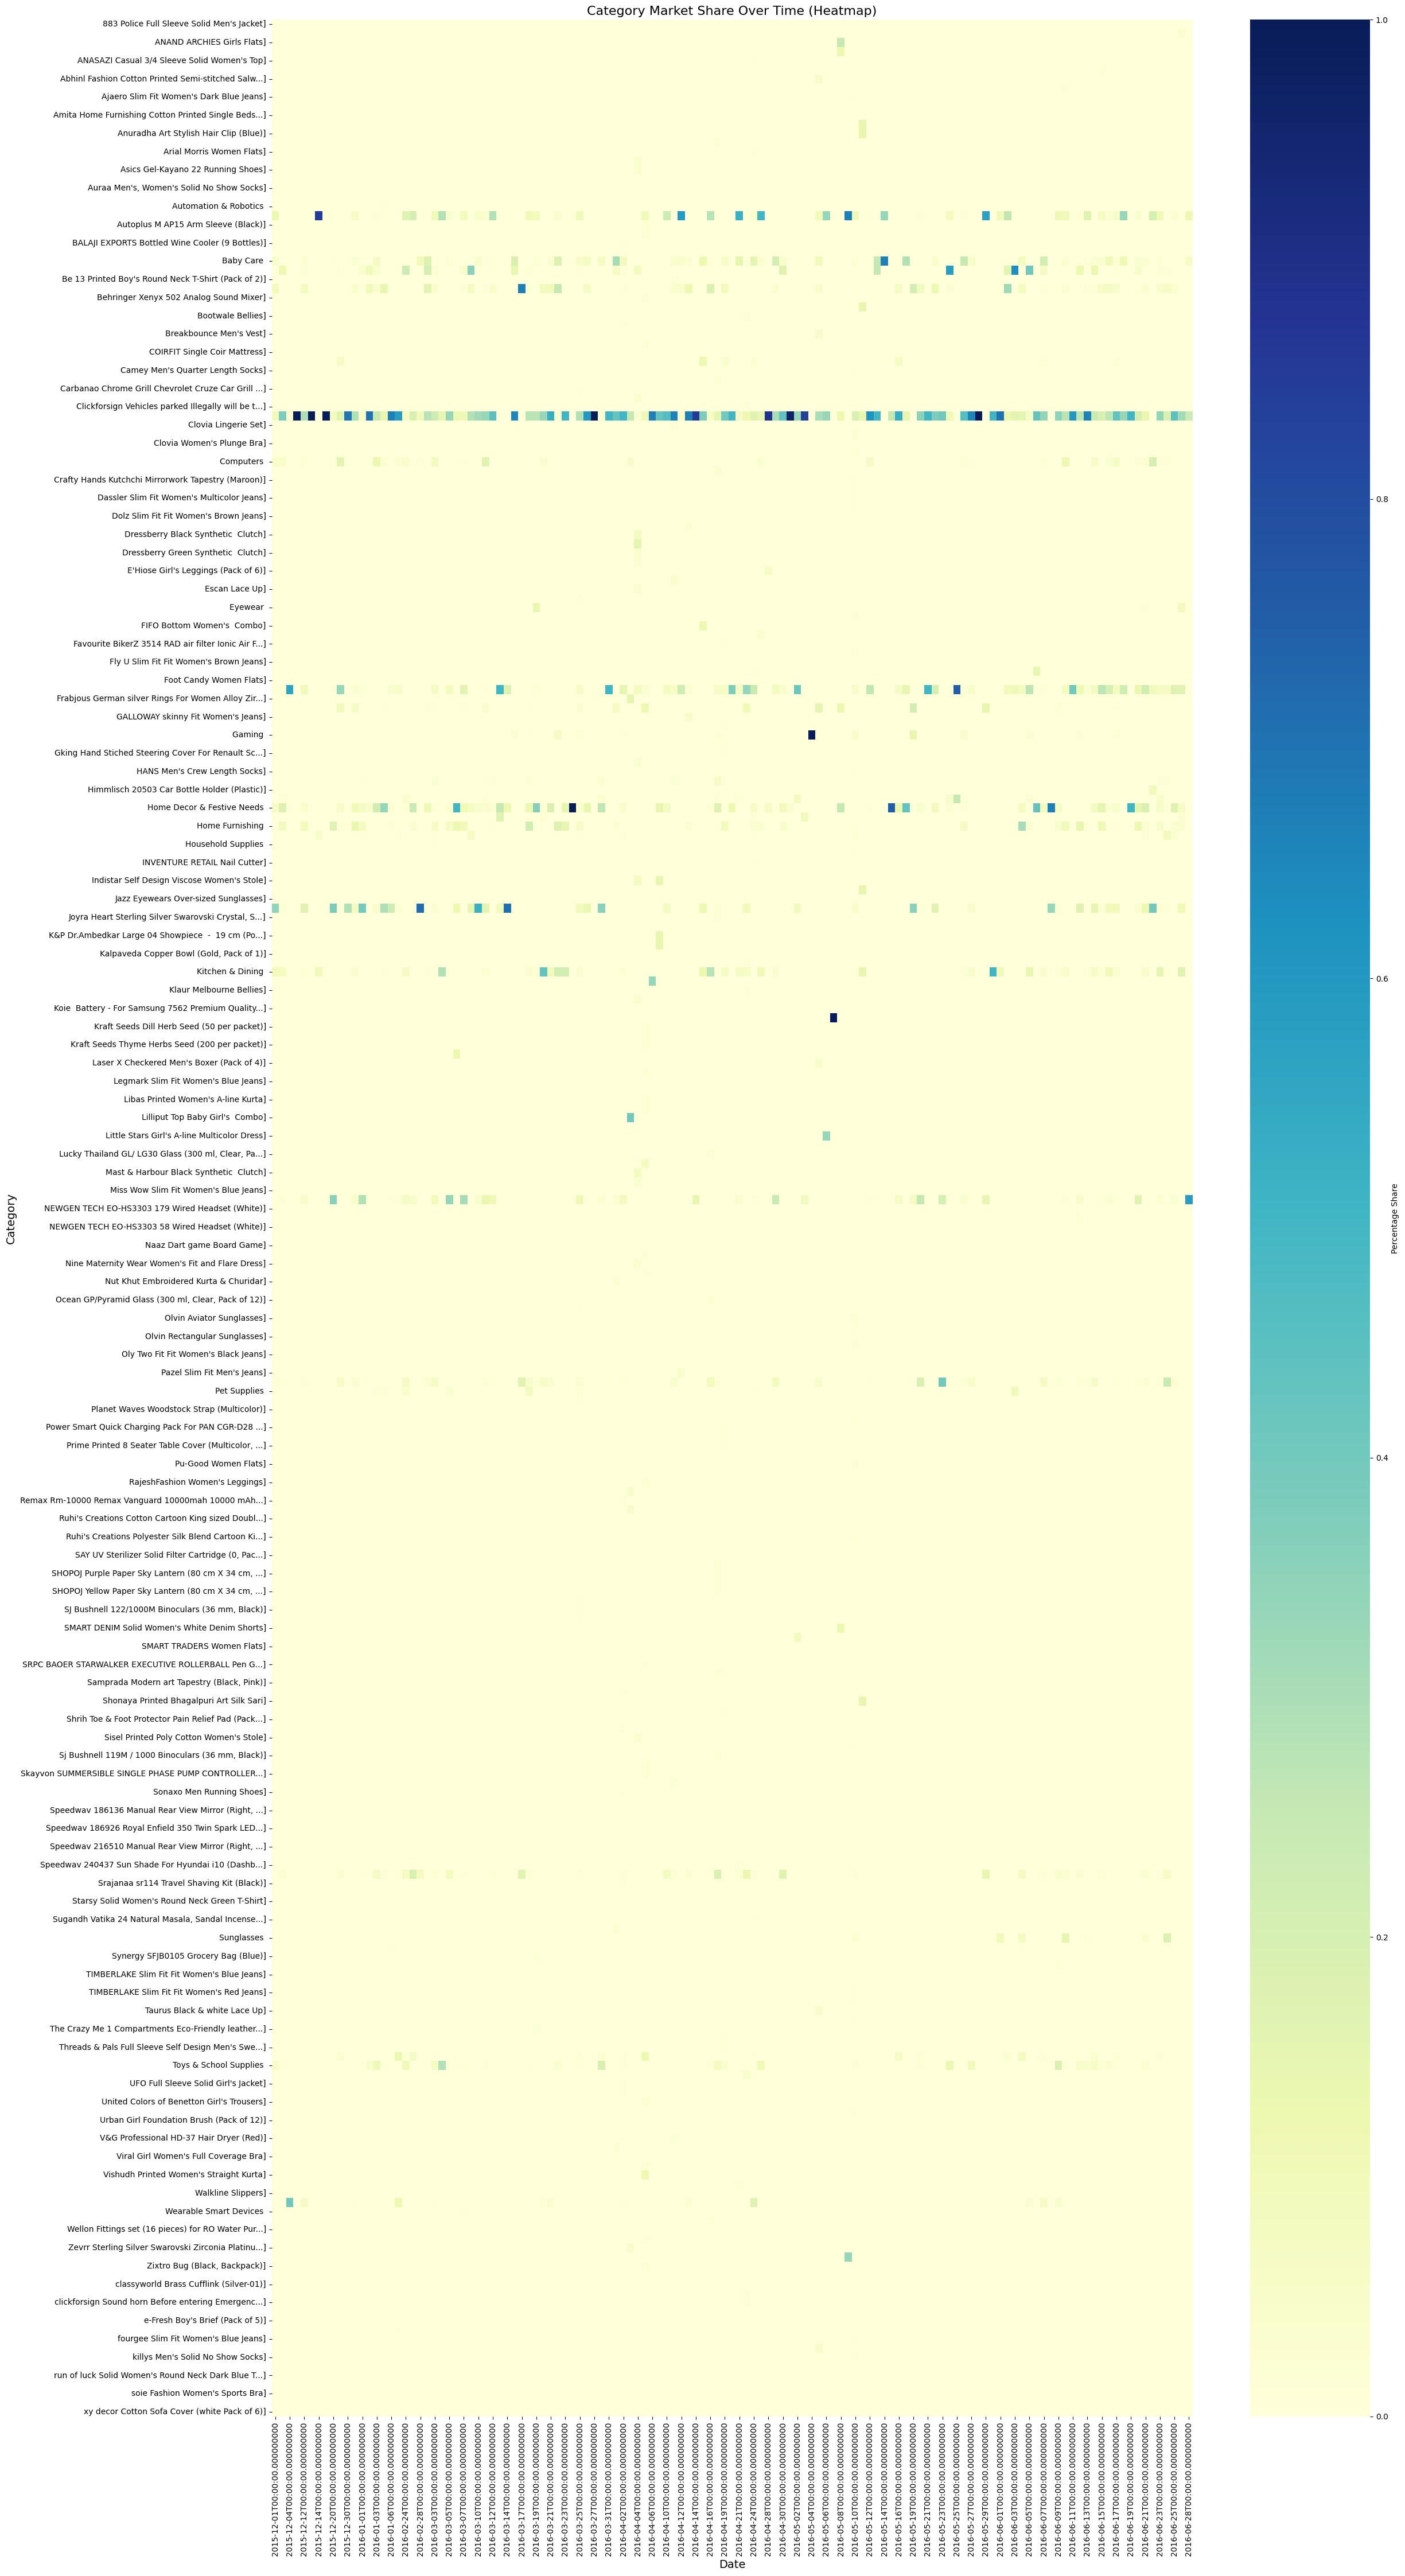

In [46]:
# 18. Category Market Share Over Time
plt.figure(figsize=(25, 45))
category_time = pd.crosstab(df['date'], df['category'])
category_time_pct = category_time.div(category_time.sum(axis=1), axis=0)
sns.heatmap(category_time_pct.T, cmap="YlGnBu", cbar_kws={'label': 'Percentage Share'})
plt.title('Category Market Share Over Time (Heatmap)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.tight_layout()
plt.show()


<ipython-input-47-b16d24cf0c55>:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



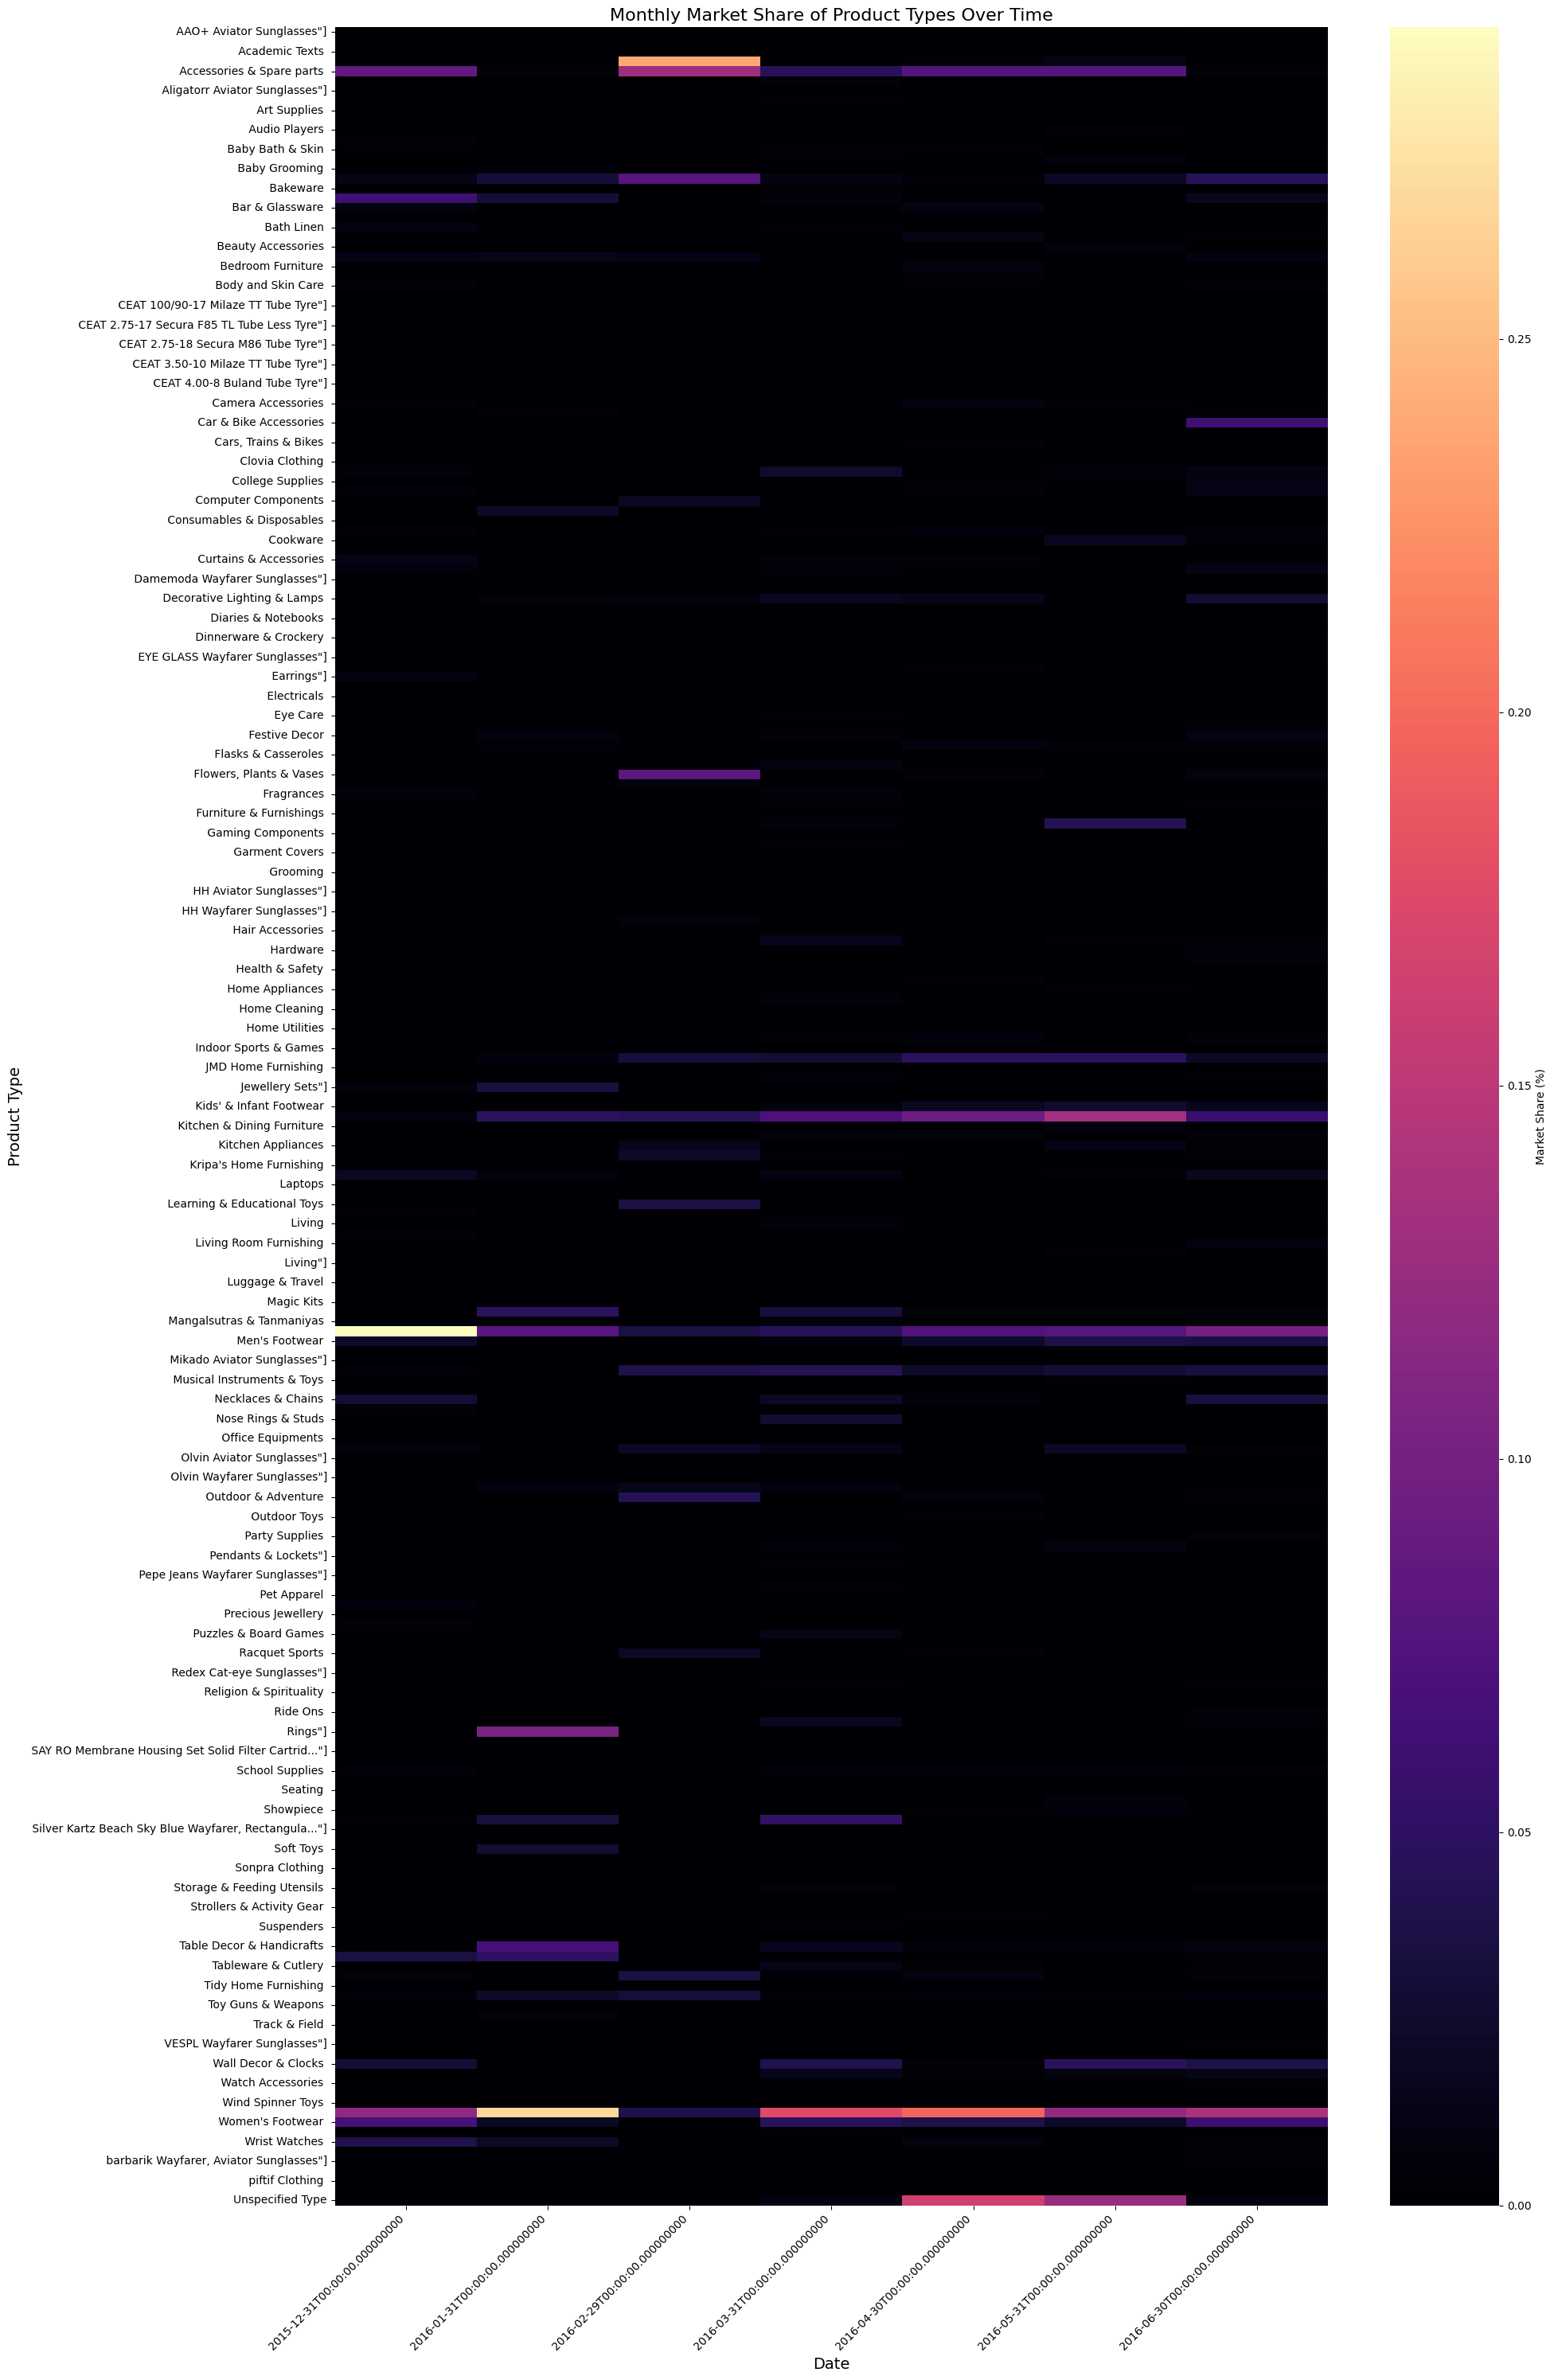

In [47]:
#19.Monthly Market Share of Product Types Over Time
# Resample to monthly averages for smoother trend visualization
type_time = pd.crosstab(df['date'], df['type'])
type_time_pct = type_time.div(type_time.sum(axis=1), axis=0)  # Convert to percentages

# Resample to monthly and fill NaN with 0 for missing months
type_time_sample = type_time_pct.resample('M').mean().fillna(0)

# Create a larger figure for better visualization
plt.figure(figsize=(20, 30))

# Generate a heatmap for the monthly market share of each product type
sns.heatmap(type_time_sample.T, cmap="magma", cbar_kws={'label': 'Market Share (%)'}, annot=False)

# Set title and labels
plt.title('Monthly Market Share of Product Types Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Product Type', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


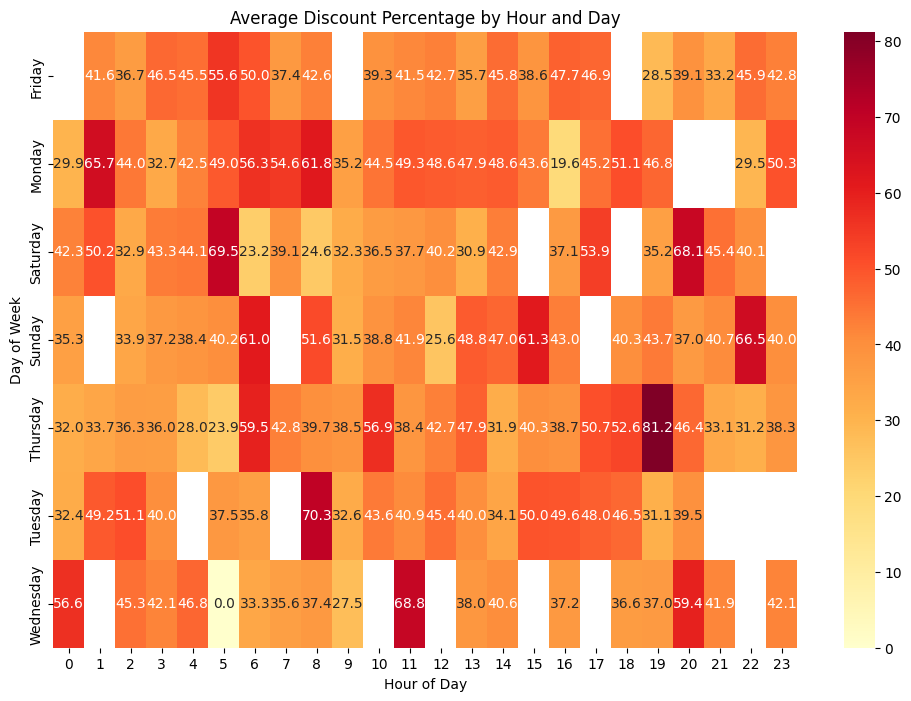

In [48]:
# 20. Discount Strategy by Hour - Heatmap
plt.figure(figsize=(12, 8))
df['hour'] = pd.to_datetime(df['time']).dt.hour
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()
discount_hour_day = df.pivot_table(values='discount_percentage',
                                 index='day_of_week',
                                 columns='hour',
                                 aggfunc='mean')
sns.heatmap(discount_hour_day, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('Average Discount Percentage by Hour and Day', fontsize=12)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


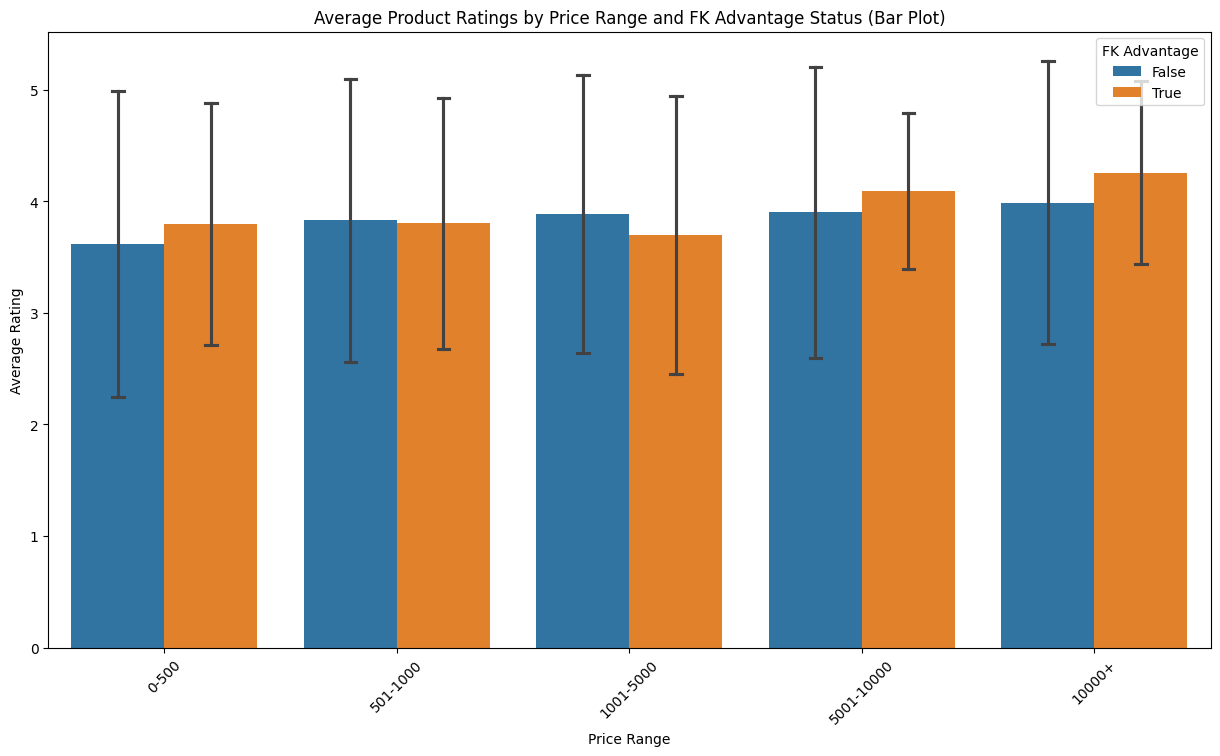

In [53]:
# 21. Product Rating Analysis - Grouped Box Plot
plt.figure(figsize=(15, 8))
sns.barplot(x='price_range', y='product_rating', hue='is_FK_Advantage_product', data=df, errorbar='sd', capsize=0.1)
plt.title('Average Product Ratings by Price Range and FK Advantage Status (Bar Plot)', fontsize=12)
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='FK Advantage', loc='upper right')
plt.show()



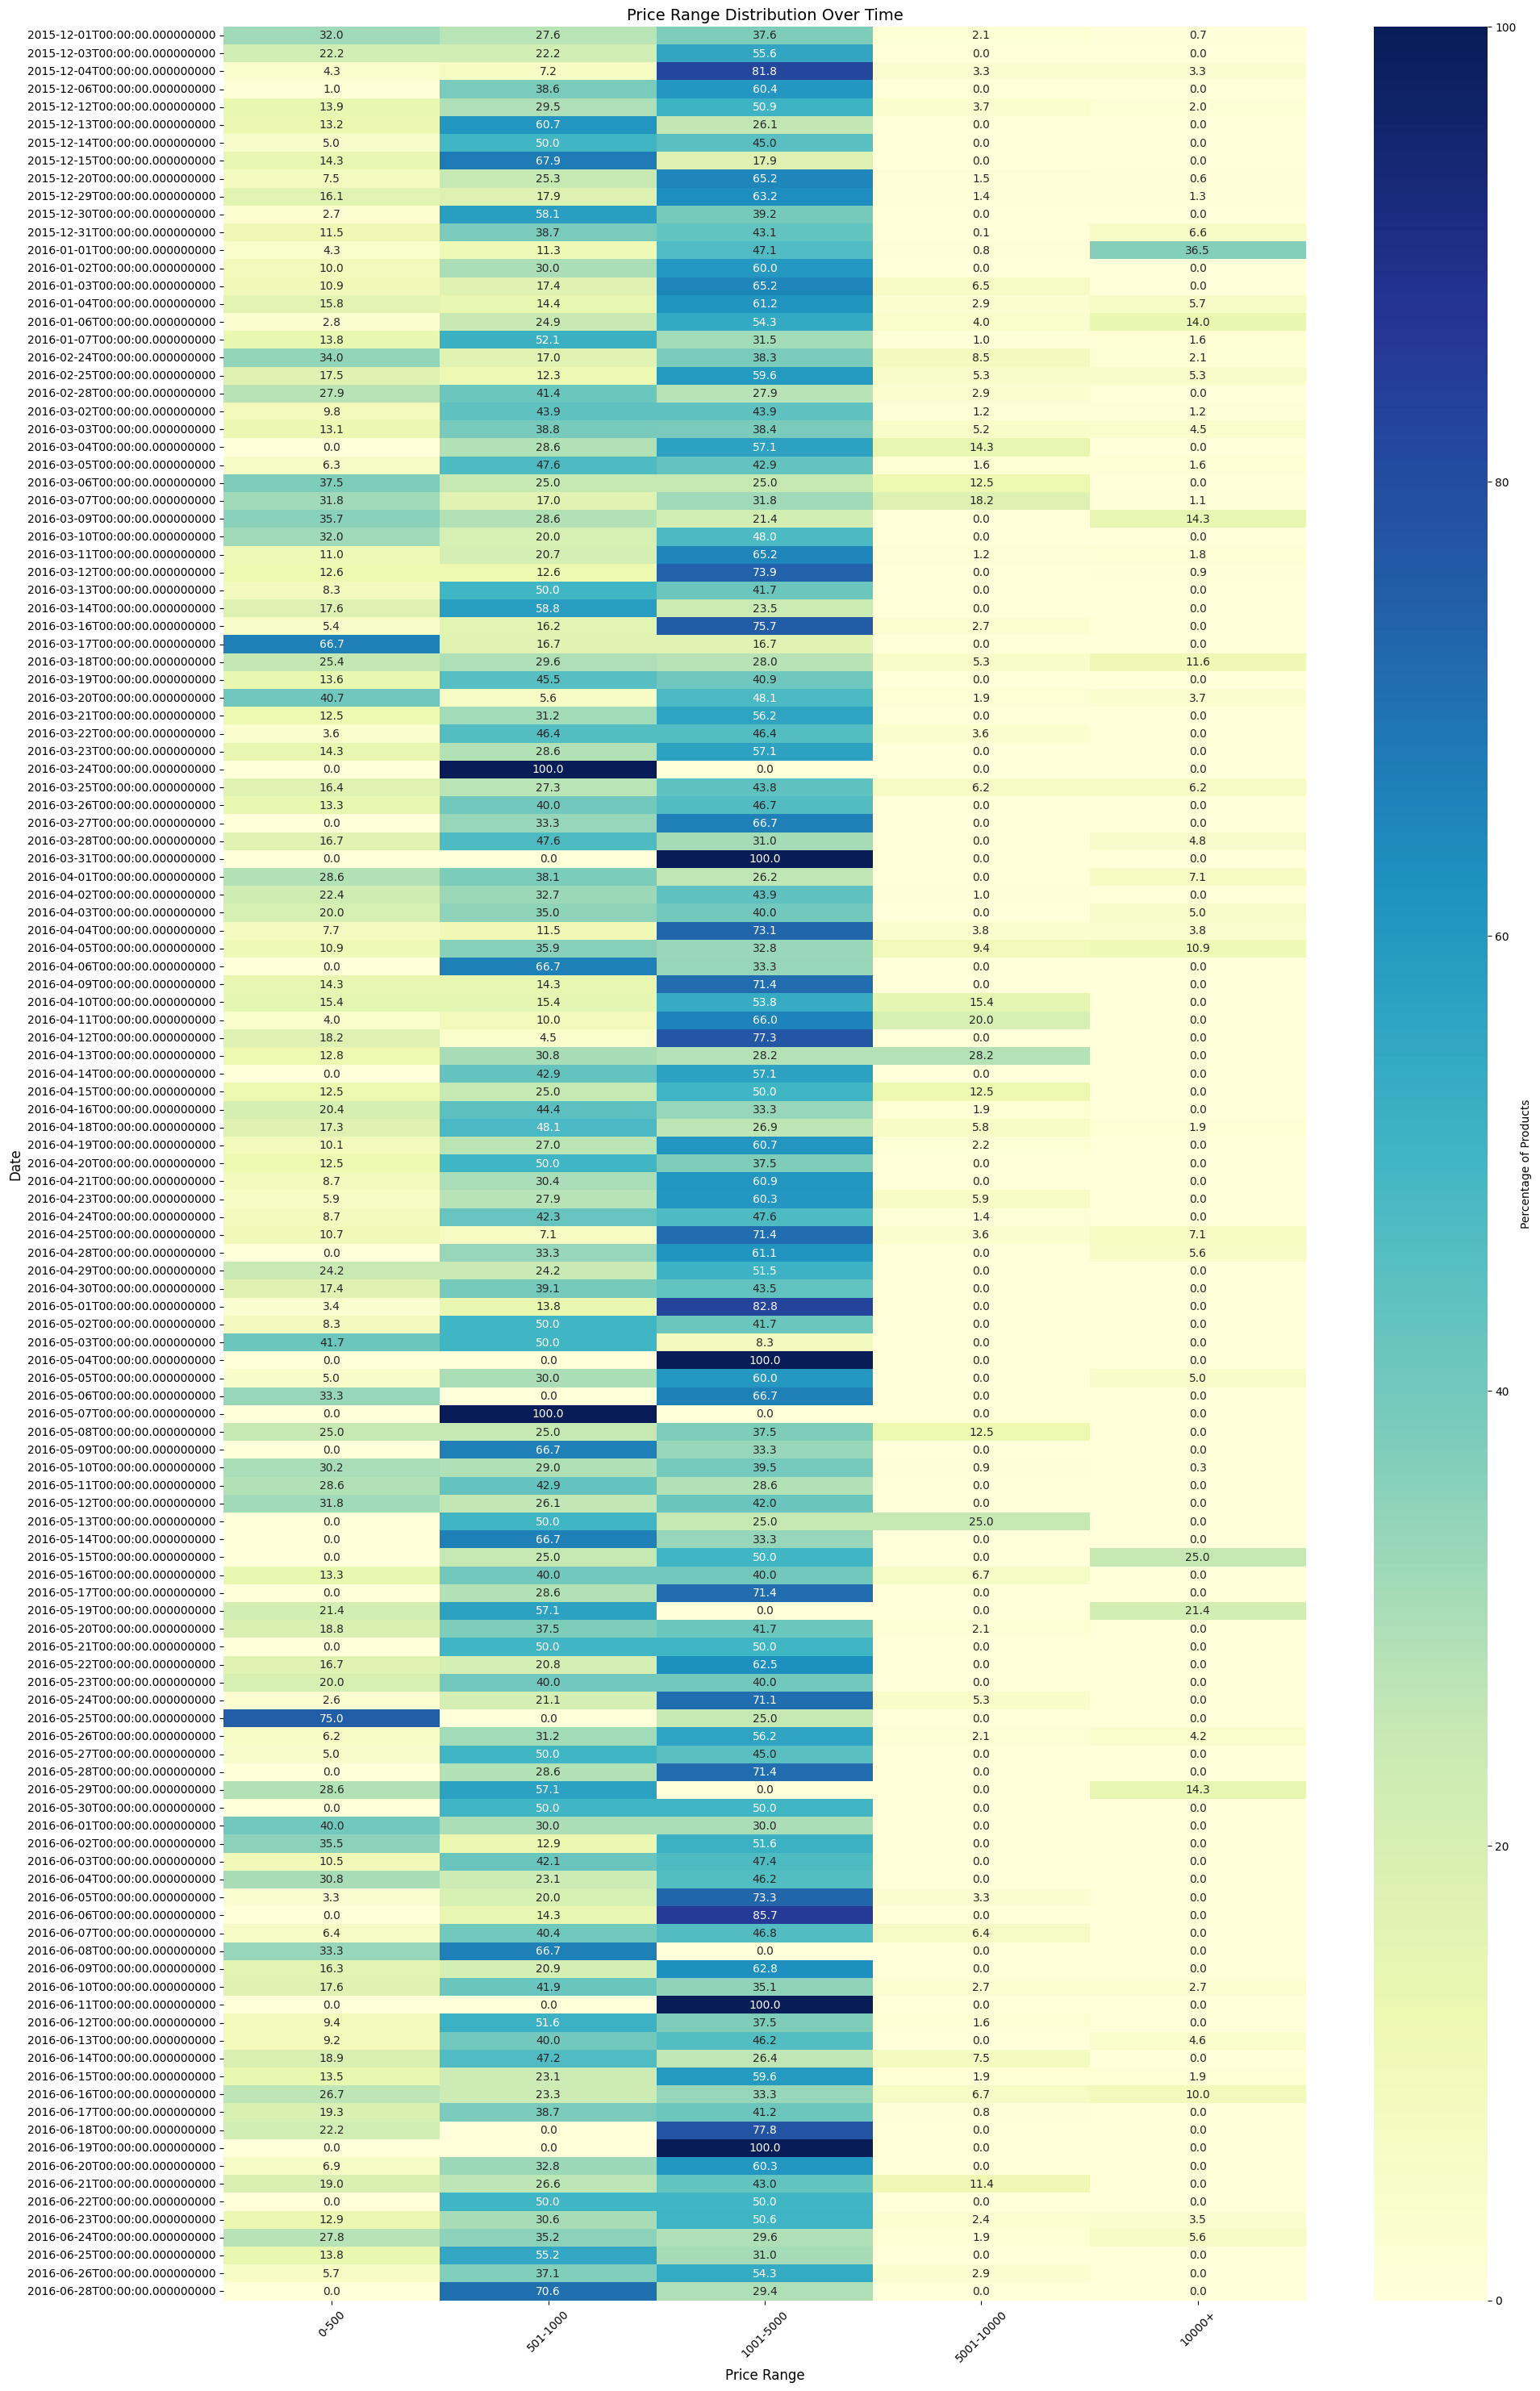

In [56]:
# 22. Price Range Evolution Over Time
plt.figure(figsize=(20, 30))
price_range_time = pd.crosstab(df['date'], df['price_range'], normalize='index') * 100
sns.heatmap(price_range_time, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage of Products'})
plt.title('Price Range Distribution Over Time', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout(pad=2)
plt.show()



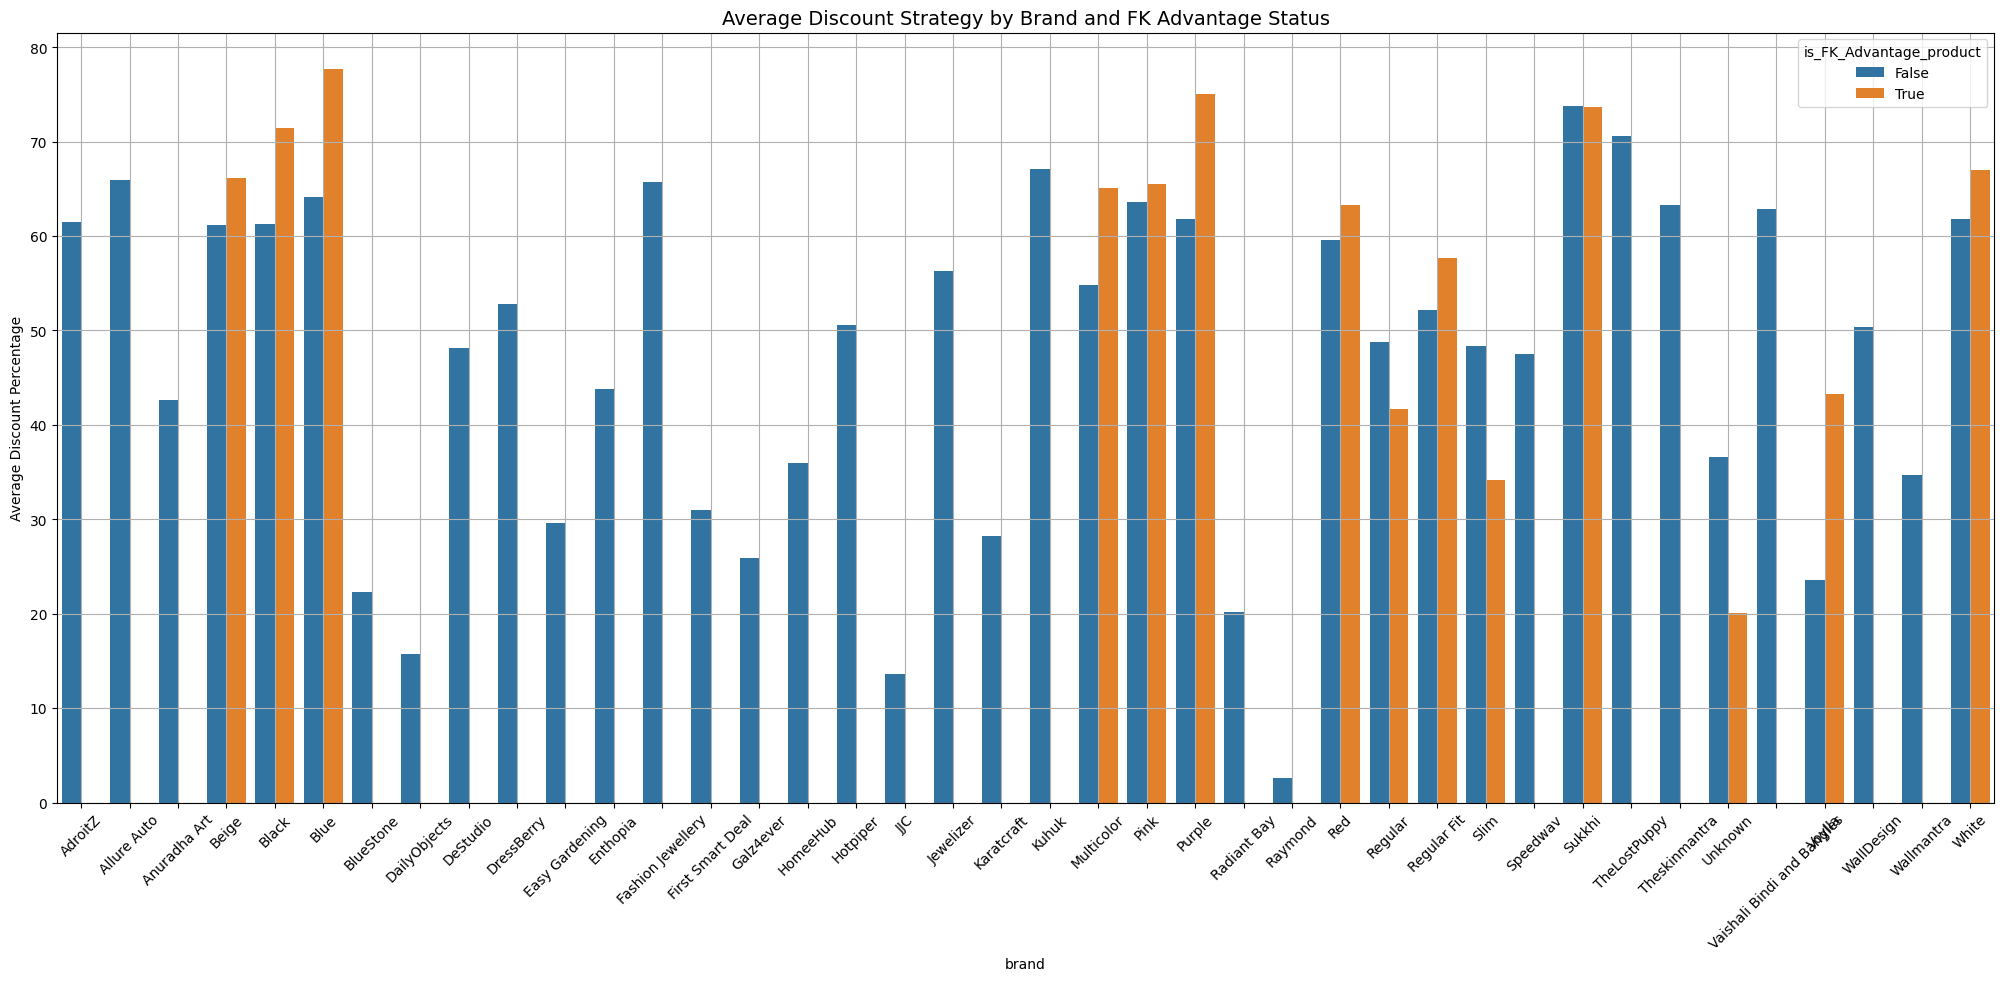

In [58]:
# 23. Brand Discount Strategy - Bar Plot with Error Bars
top_brands = df['brand'].value_counts().head(40).index
mean_discounts = df[df['brand'].isin(top_brands)].groupby(['brand', 'is_FK_Advantage_product'])['discount_percentage'].mean().reset_index()

# Create a bar plot without error bars
plt.figure(figsize=(25, 10))
sns.barplot(data=mean_discounts, x='brand', y='discount_percentage', hue='is_FK_Advantage_product', errorbar=None)
plt.title('Average Discount Strategy by Brand and FK Advantage Status', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Average Discount Percentage')
plt.grid(True)
plt.show()


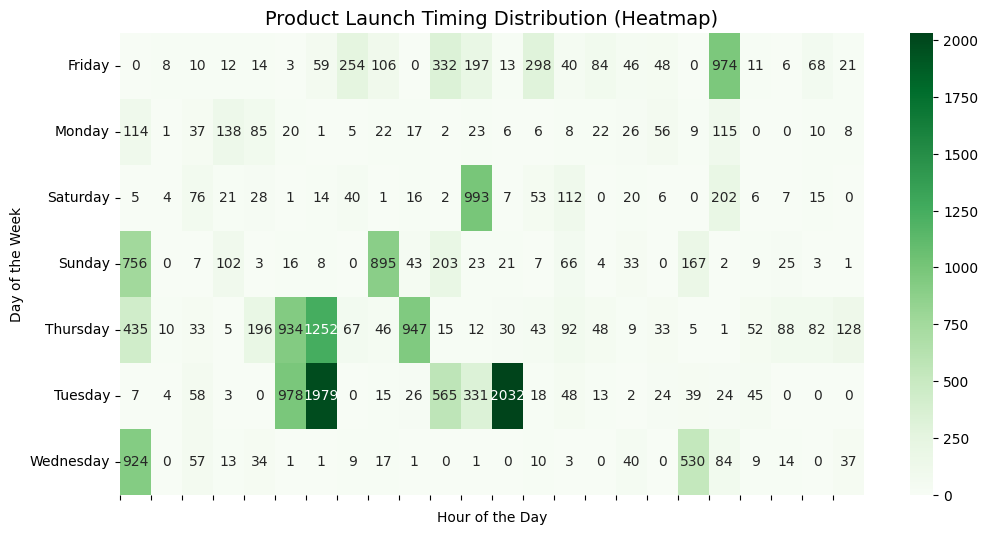

In [59]:
# 24. Product Launch Timing
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()
launch_counts = df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(launch_counts, cmap='Greens', annot=True, fmt="d")
plt.title('Product Launch Timing Distribution (Heatmap)', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.xticks(range(24))  # Set x-ticks to represent each hour
plt.show()


In [60]:
# 25. Brand Portfolio Analysis - Treemap with Multiple Levels
fig = px.treemap(df,
                 path=['brand', 'category', 'style'],
                 values='retail_price',
                 color='discount_percentage',
                 title='Brand Portfolio Analysis')
fig.update_layout(width=1500, height=1000)
fig.show()


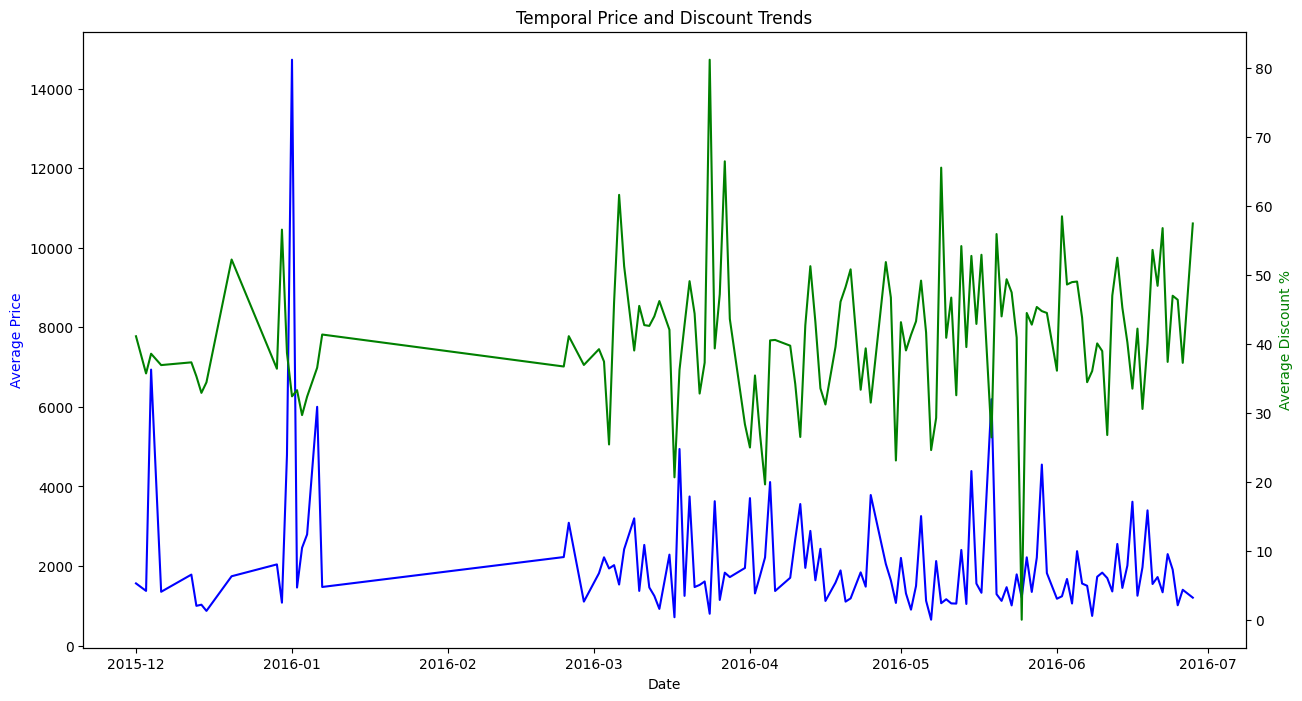

In [61]:
# 26. Temporal Price Trends - Dual Axis Plot
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

daily_price = df.groupby('date')['retail_price'].mean()
daily_discount = df.groupby('date')['discount_percentage'].mean()

ax1.plot(daily_price.index, daily_price.values, 'b-', label='Average Price')
ax2.plot(daily_discount.index, daily_discount.values, 'g-', label='Average Discount')

ax1.set_xlabel('Date')
ax1.set_ylabel('Average Price', color='b')
ax2.set_ylabel('Average Discount %', color='g')

plt.title('Temporal Price and Discount Trends', fontsize=12)
plt.show()

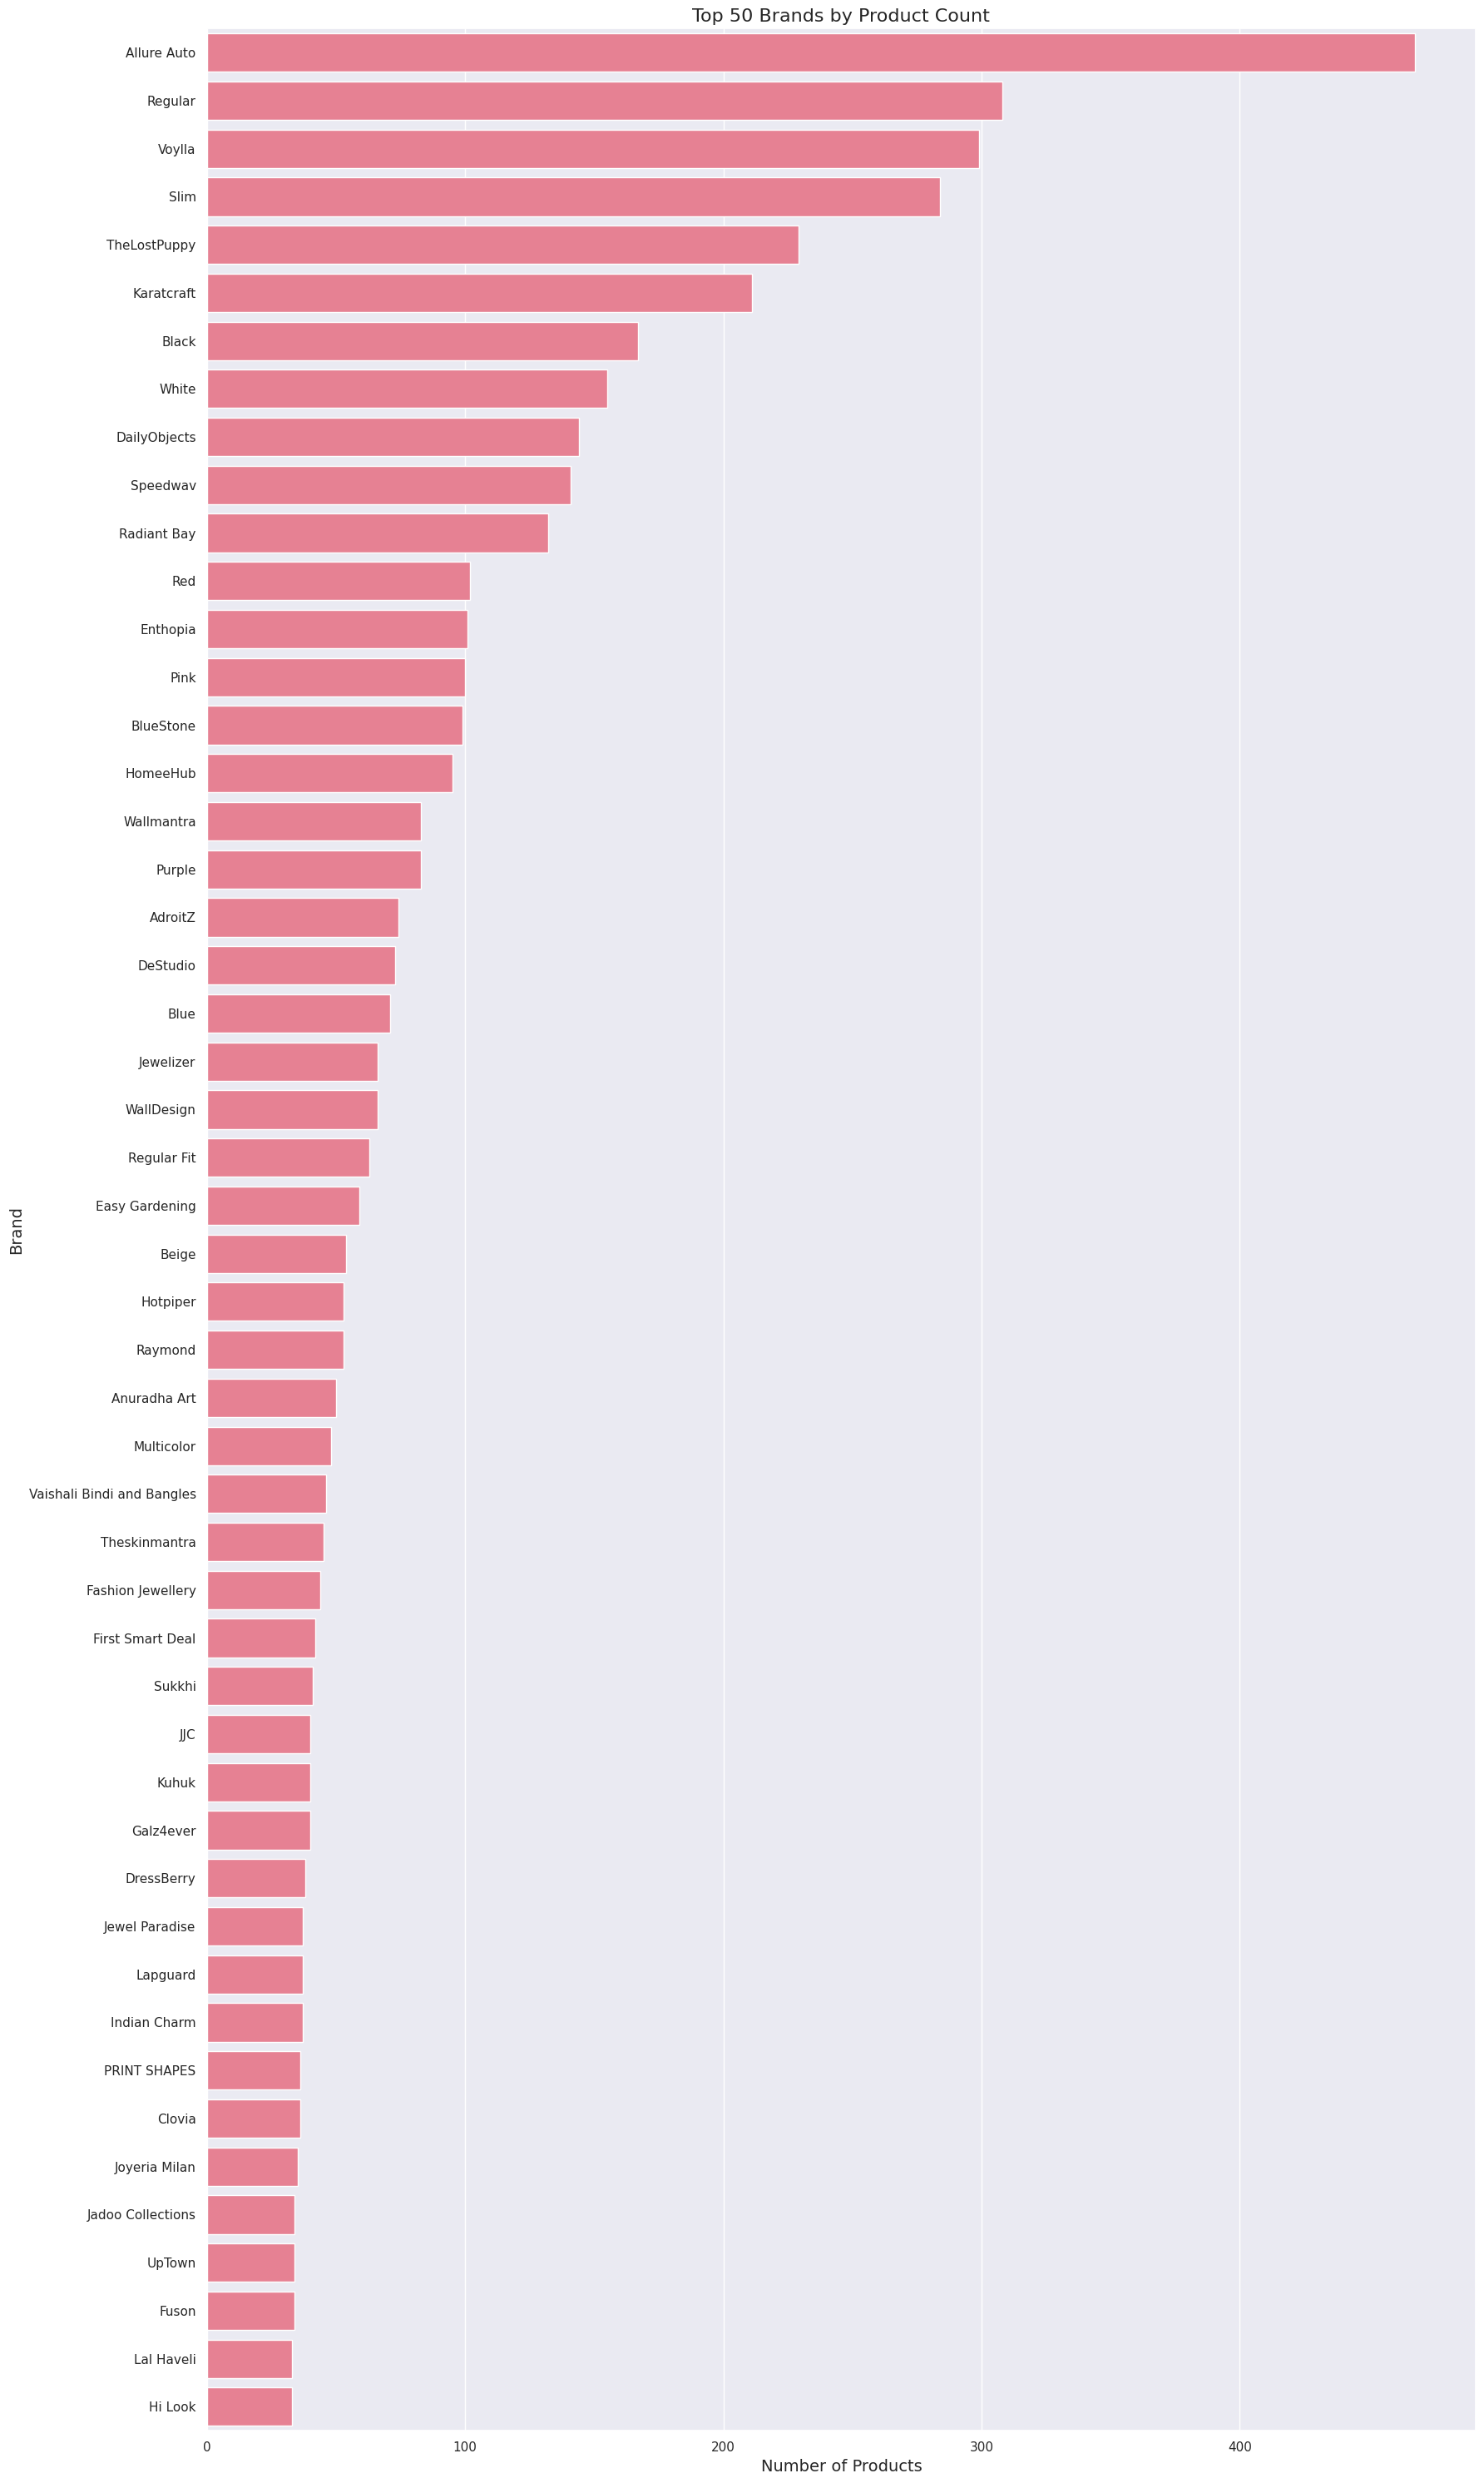

In [95]:
# 27. Top Brands by Product Count
sns.set_theme(style="darkgrid")
sns.set_palette("husl")
# Filter out unknown brands
filtered_brands = df[df['brand'].str.lower() != 'unknown']

# Get the counts for the top brands
brand_counts = filtered_brands['brand'].value_counts().head(50)

# Create the bar plot
plt.figure(figsize=(18, 30))
sns.barplot(x=brand_counts.values, y=brand_counts.index)
plt.title('Top 50 Brands by Product Count', fontsize=16)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.tight_layout()
plt.show()



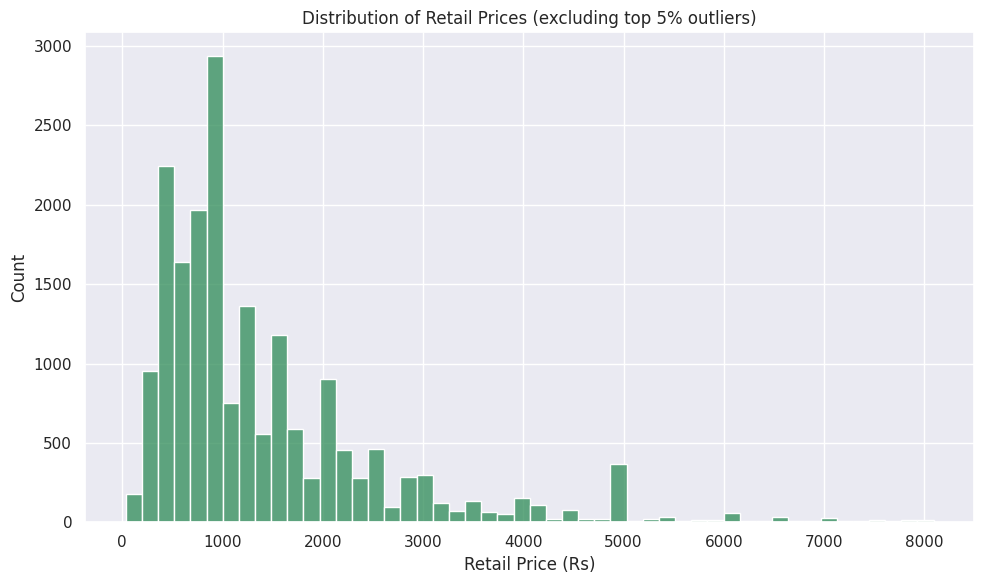

In [84]:
# 28. Price Distribution
plt.figure(figsize=(10, 6))
price_data = df[df['retail_price'] < df['retail_price'].quantile(0.95)]
sns.histplot(data=price_data, x='retail_price', bins=50, color= '#2E8B57')
plt.title('Distribution of Retail Prices (excluding top 5% outliers)')
plt.xlabel('Retail Price (Rs)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

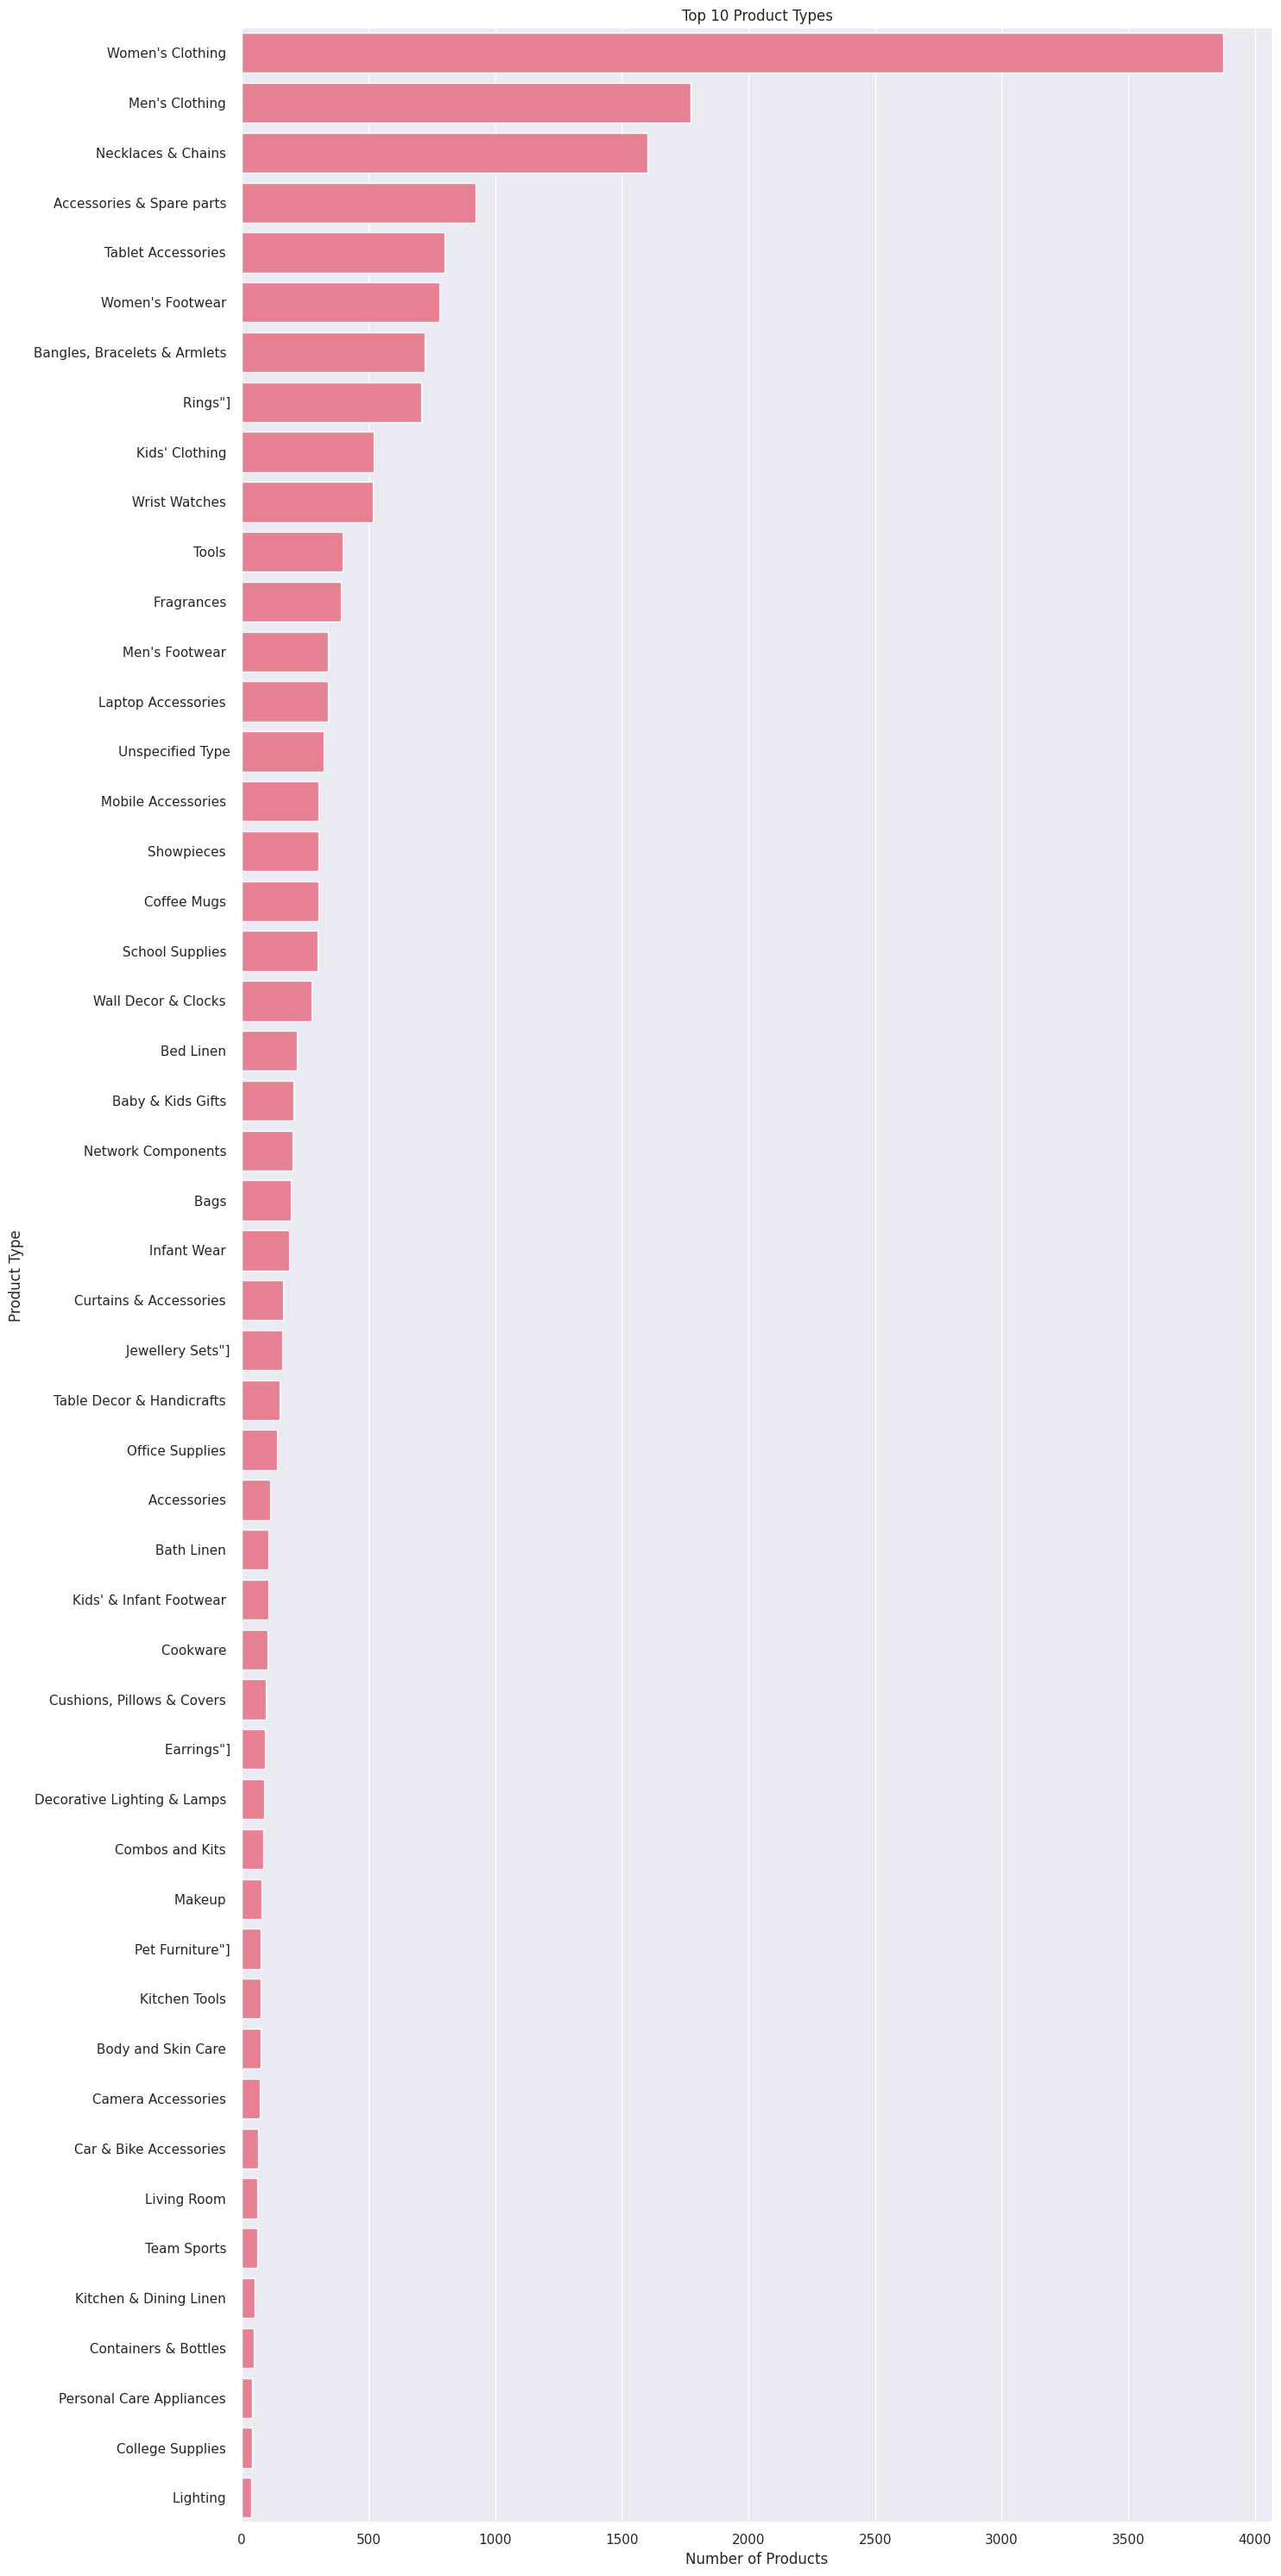

In [96]:
# 29. Top Product Types
plt.figure(figsize=(15, 30))
type_counts = df['type'].value_counts().head(50)
sns.barplot(x=type_counts.values, y=type_counts.index)
plt.title('Top 10 Product Types')
plt.xlabel('Number of Products')
plt.ylabel('Product Type')
plt.tight_layout()
plt.show()

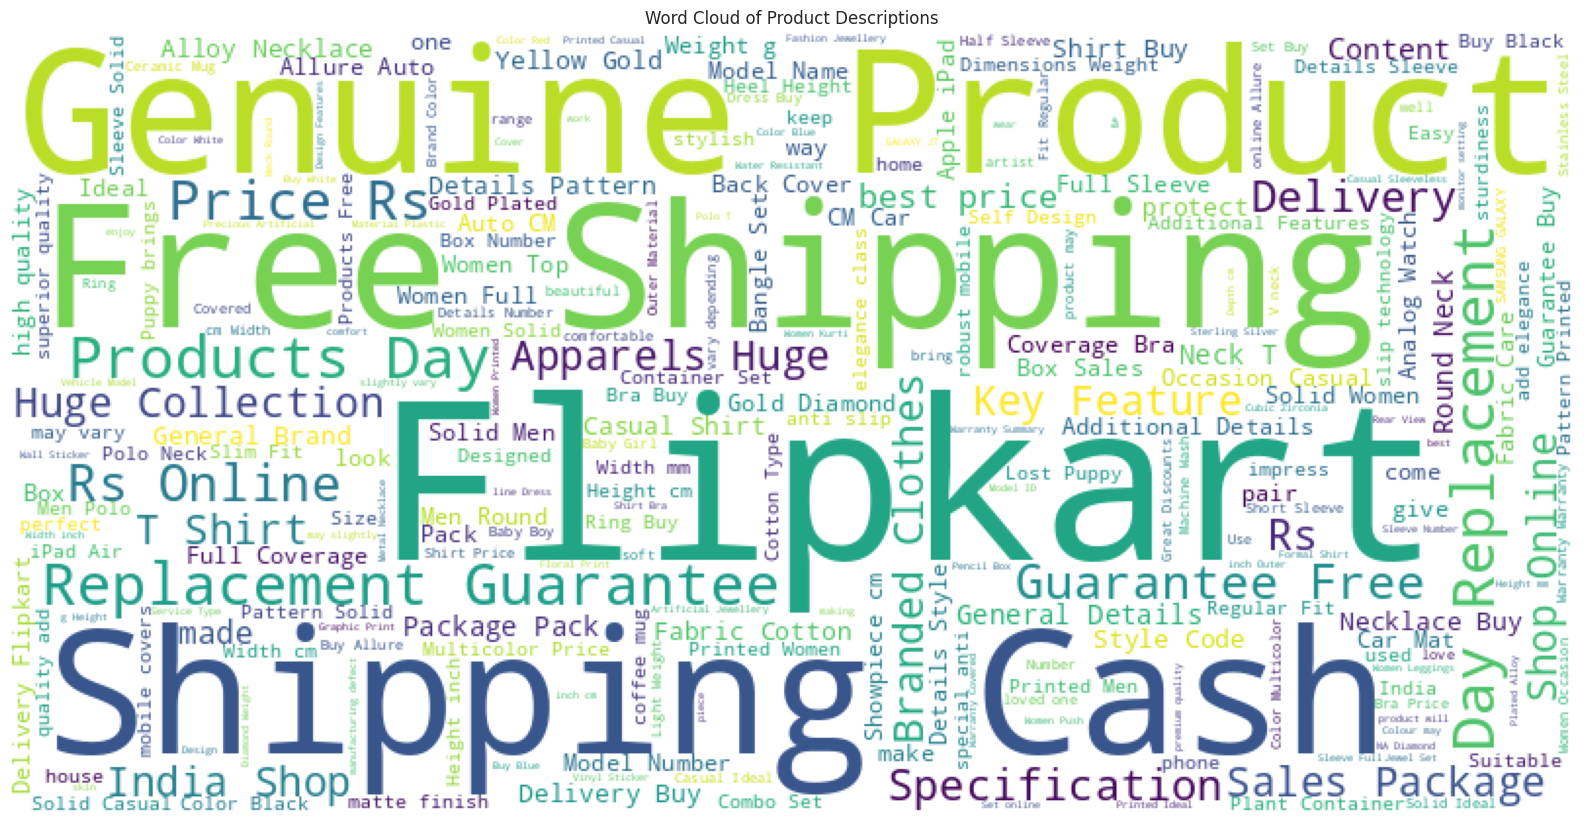

In [97]:
# 30. Word Cloud of Product Descriptions
plt.figure(figsize=(16, 10))
text = ' '.join(df['description'].astype(str))
wordcloud = WordCloud(width=800, height=400,
                     background_color='white',
                     max_words=250).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Product Descriptions')
plt.tight_layout()
plt.show()


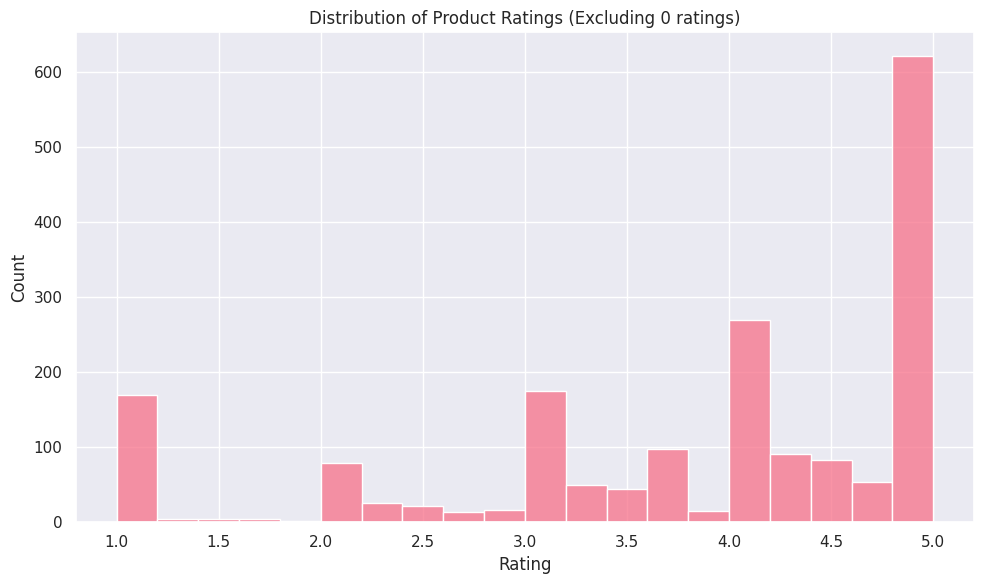

In [100]:
# 31. Product Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['product_rating'] > 0], x='product_rating', bins=20)
plt.title('Distribution of Product Ratings (Excluding 0 ratings)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
